In [150]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

In [151]:
#Importación de datos
datos=np.genfromtxt('Rayleigh.csv',delimiter=",",names=True)
v = np.sqrt((datos['vx'])**2 + (datos['vy'])**2)

In [152]:
def distribucion_rayleigh(x,sigma):
    return (x/sigma)*(np.exp((-x**2)/(2*sigma)))

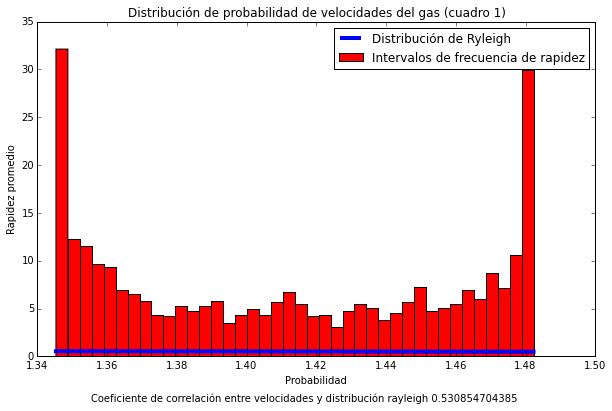

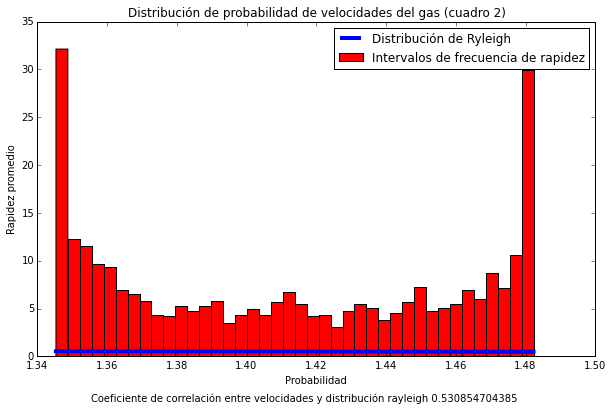

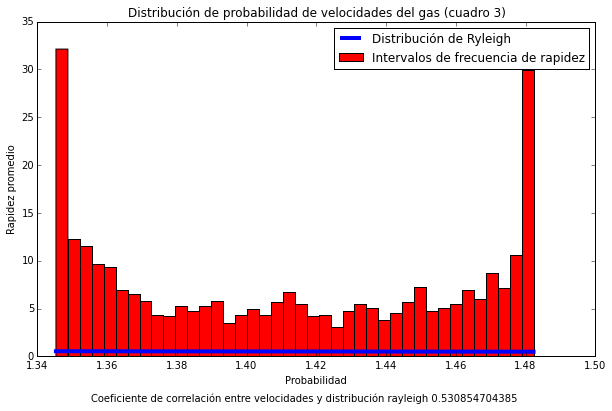

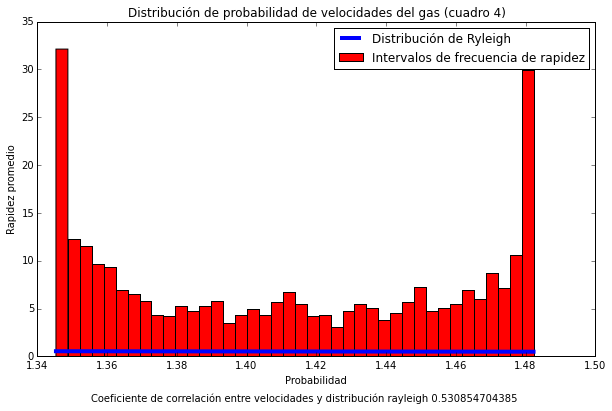

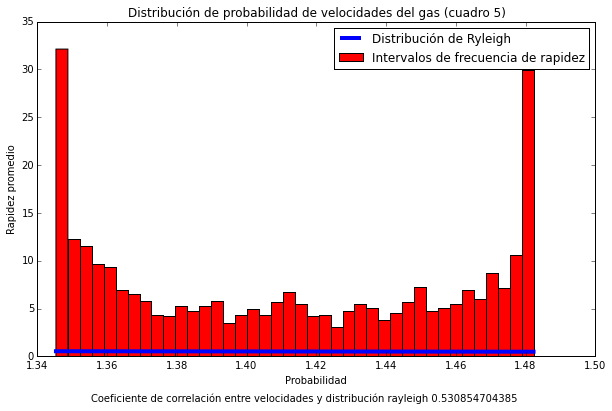

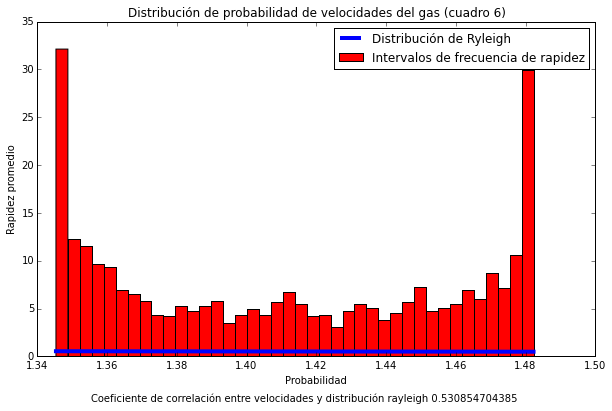

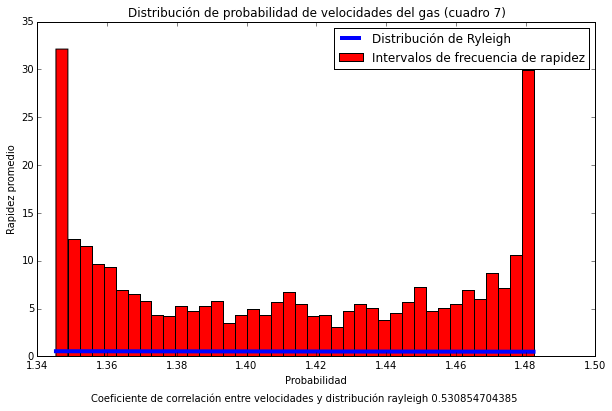

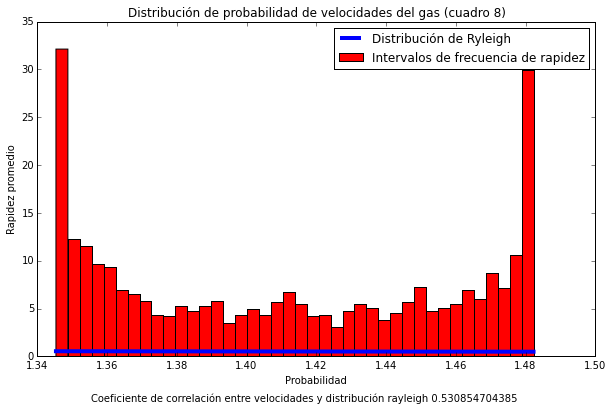

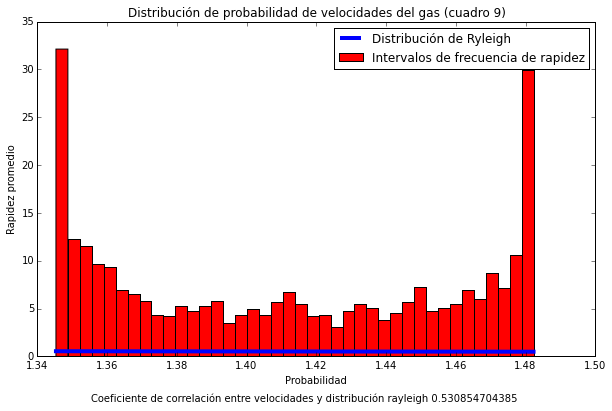

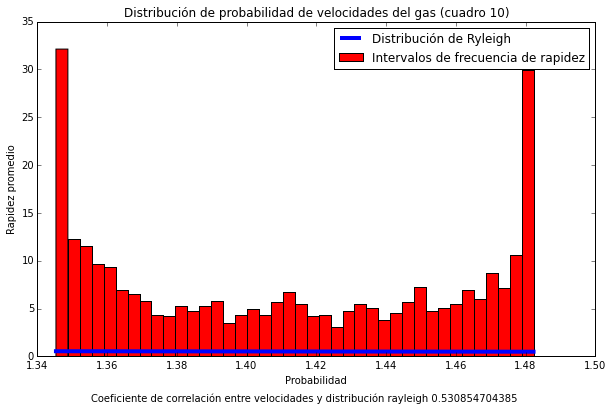

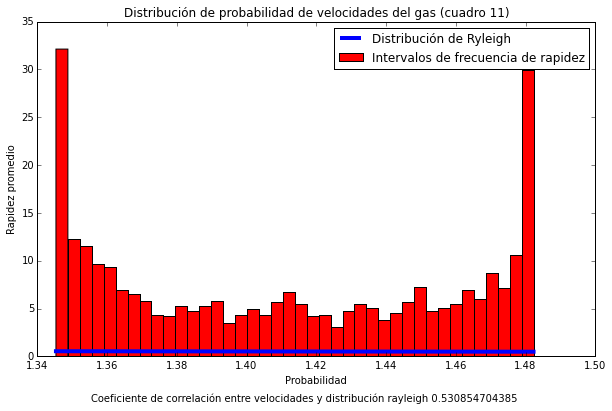

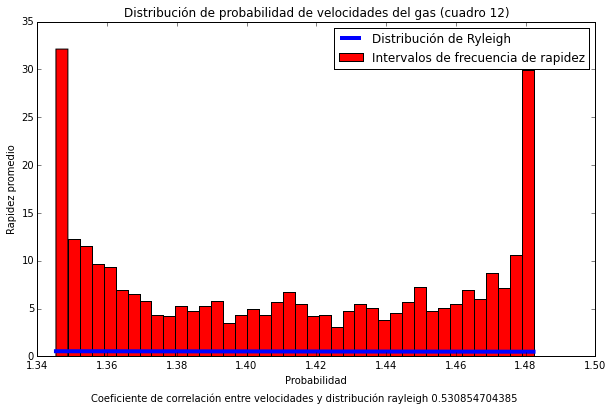

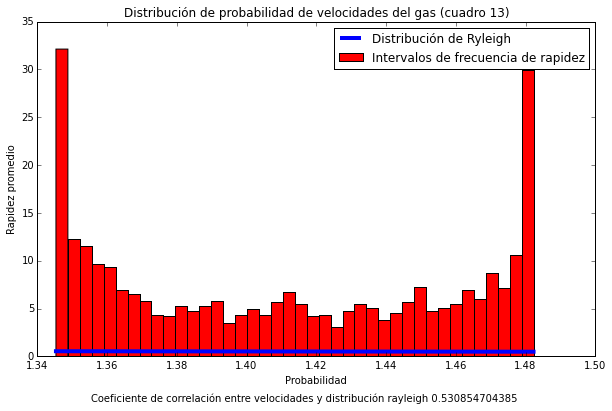

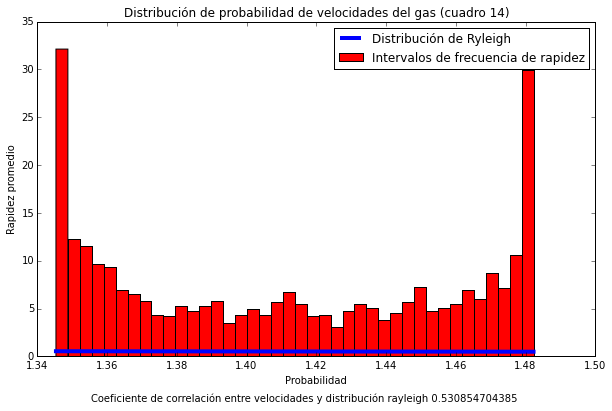

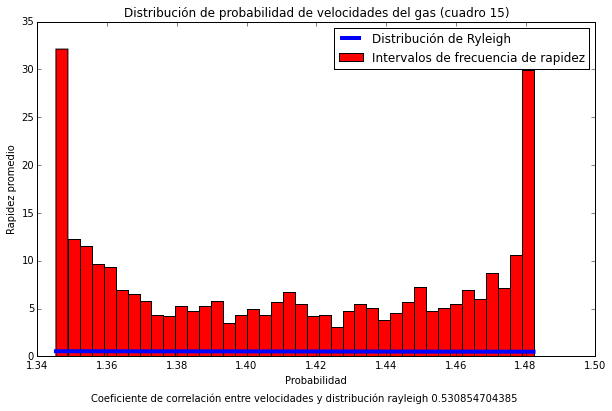

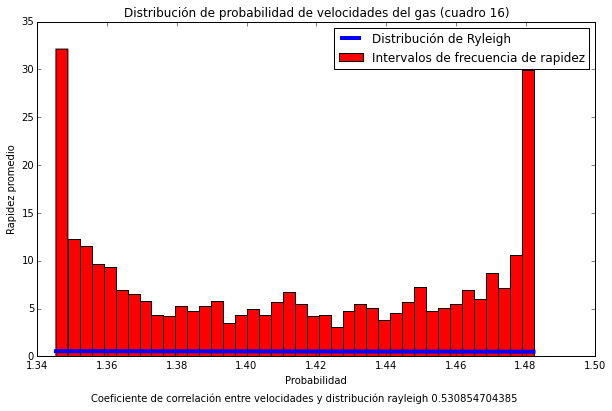

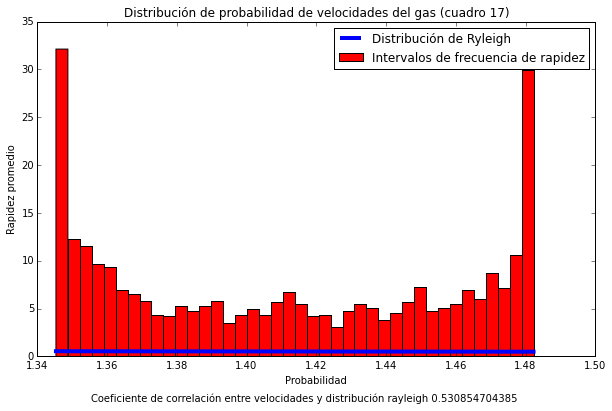

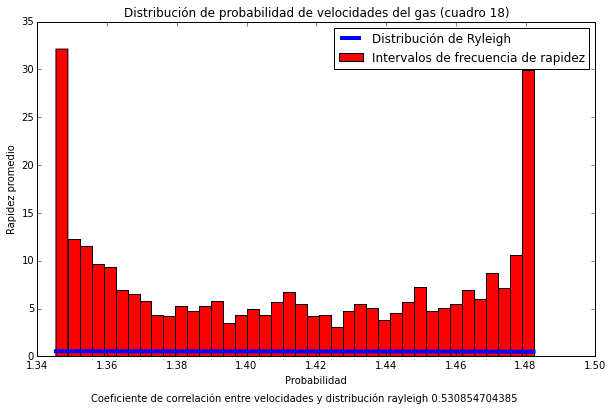

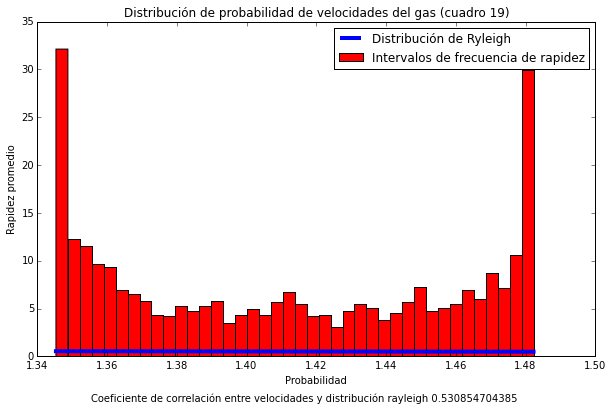

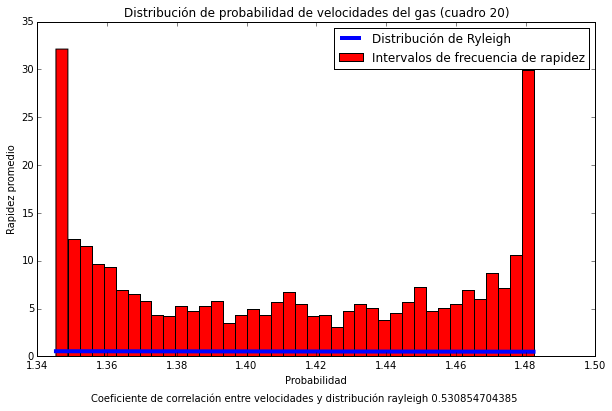

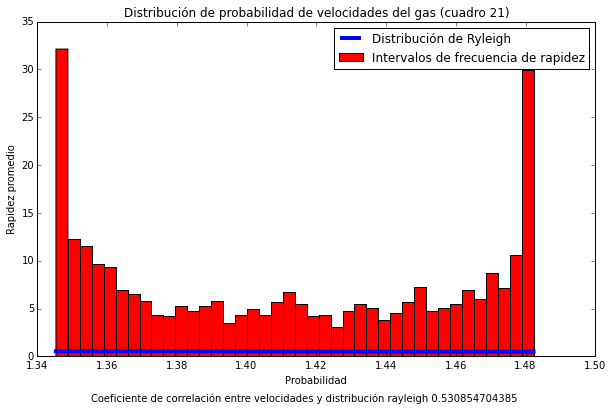

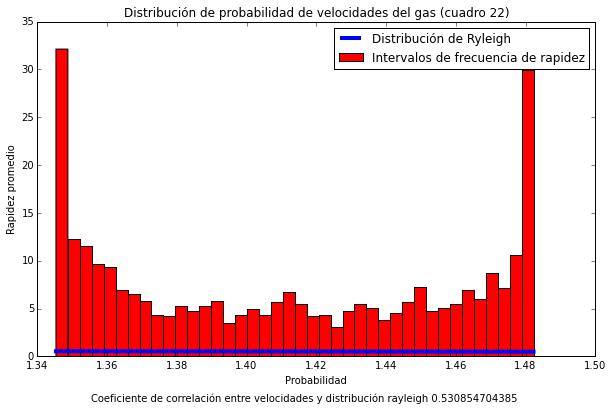

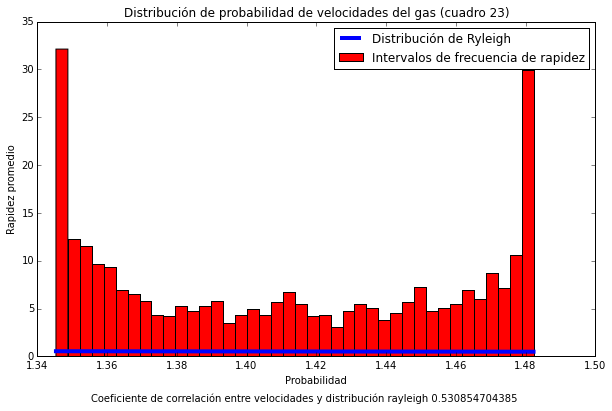

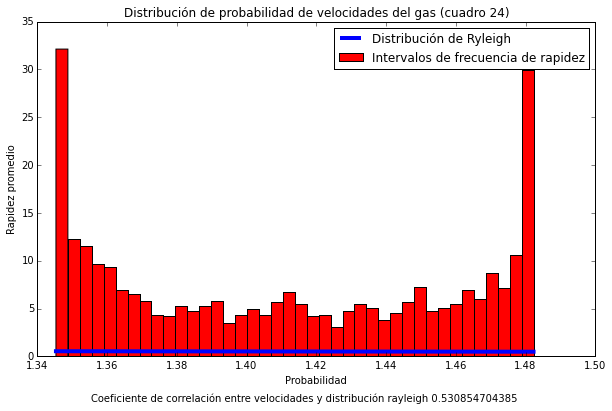

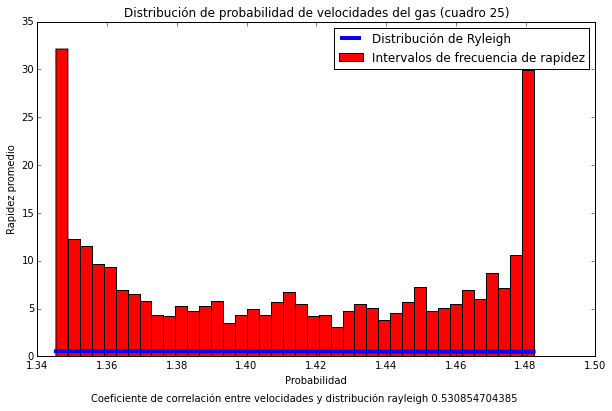

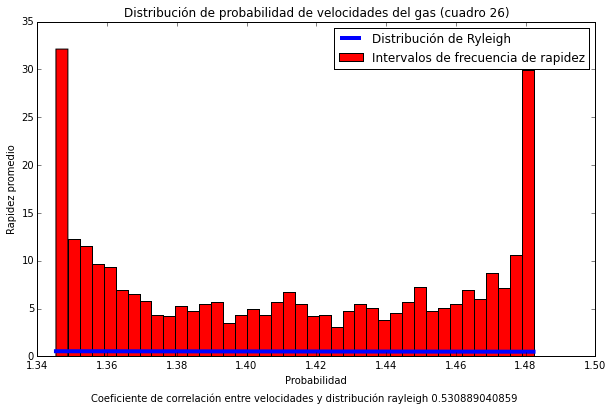

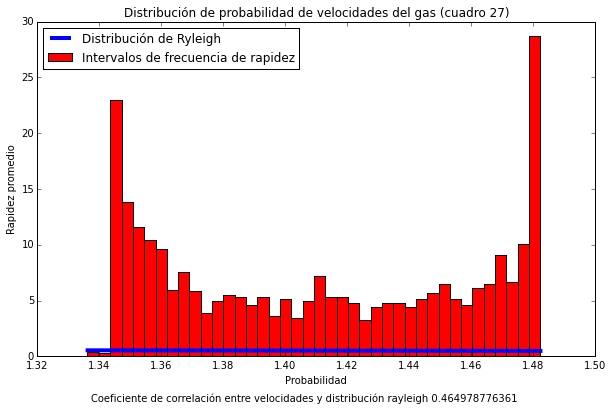

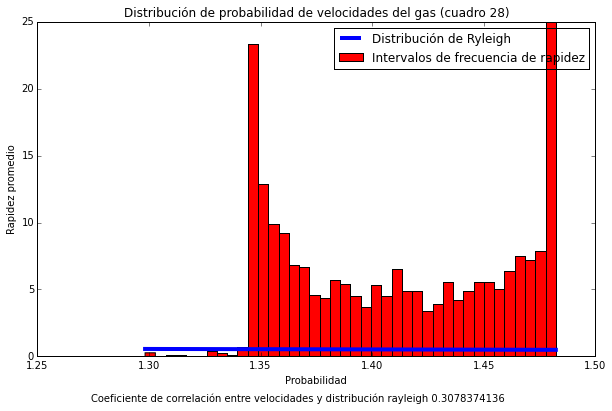

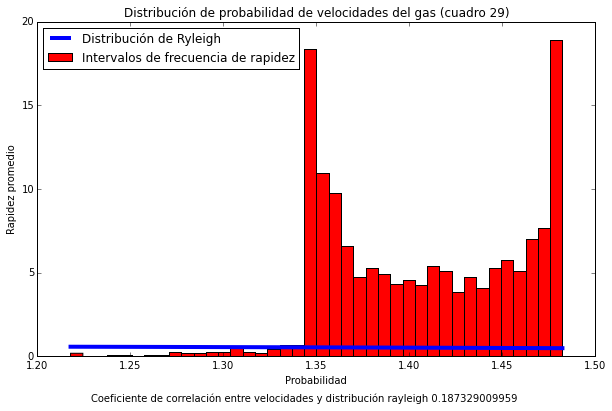

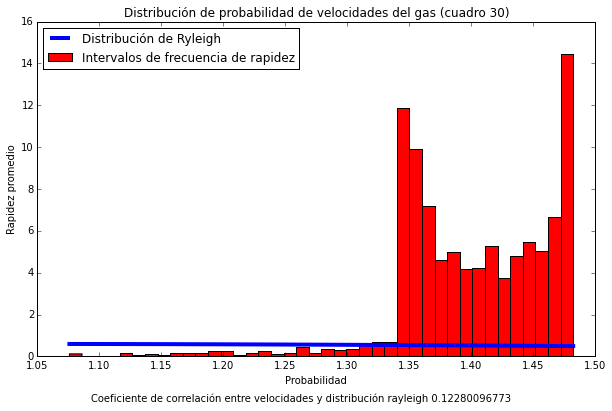

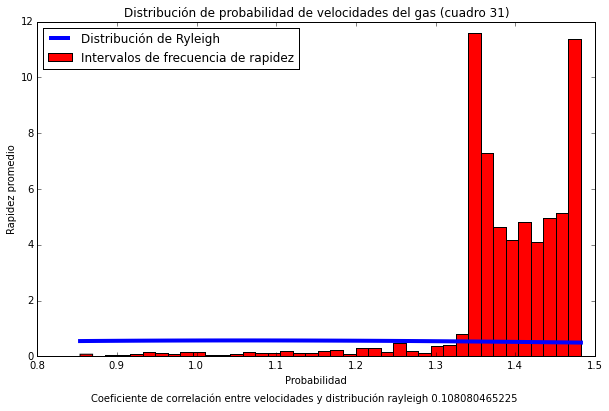

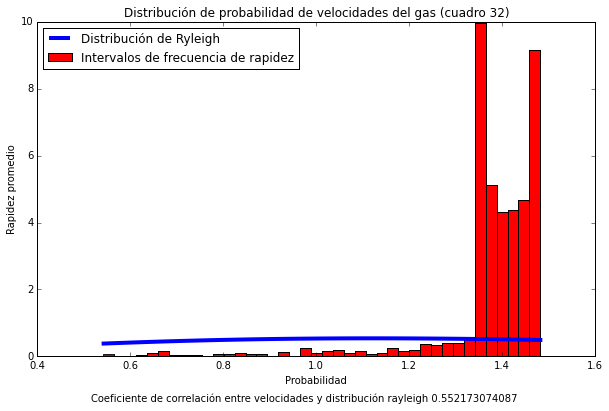

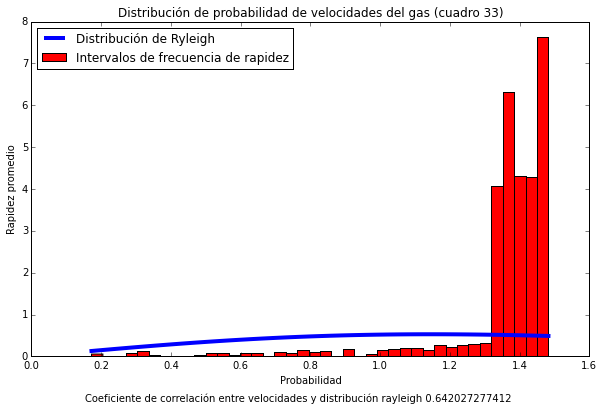

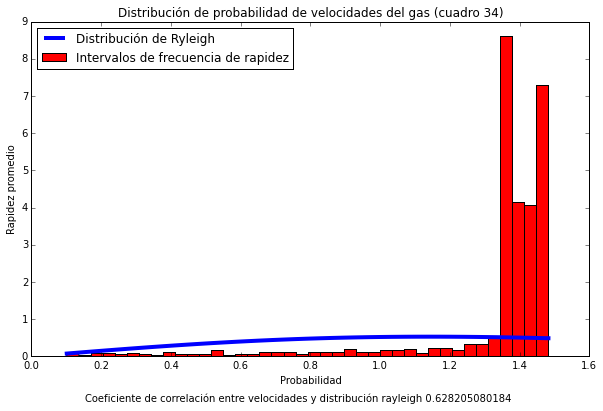

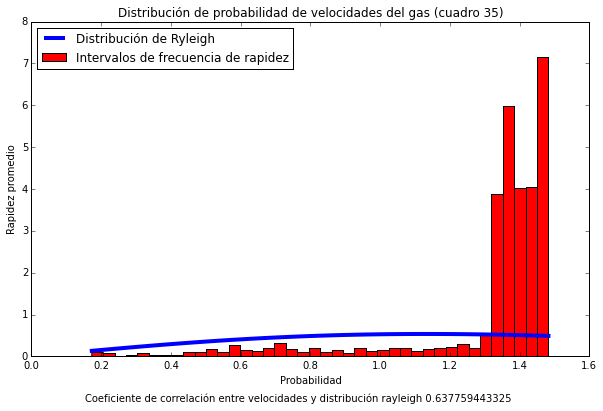

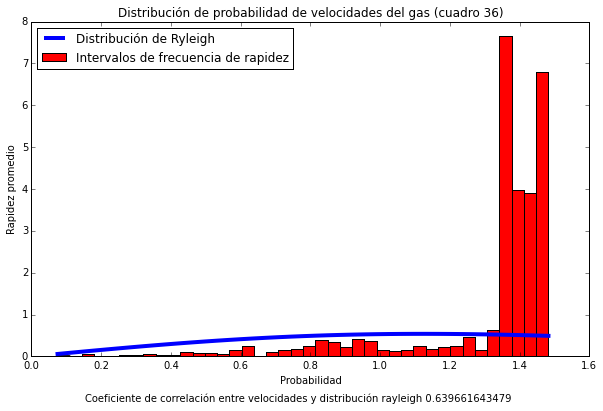

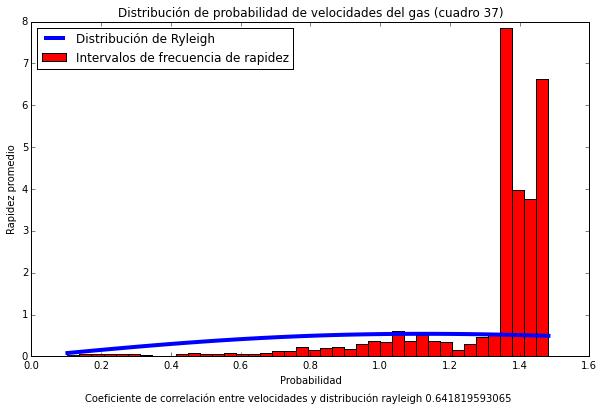

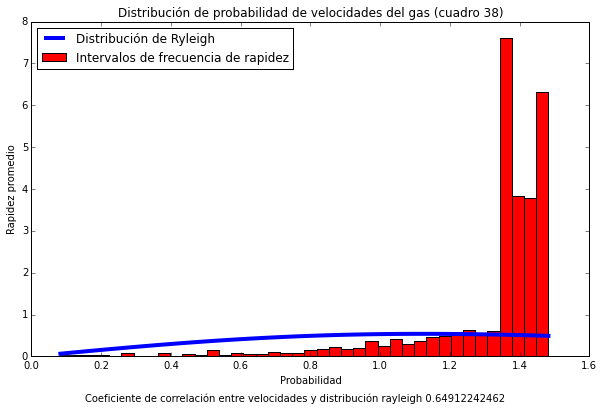

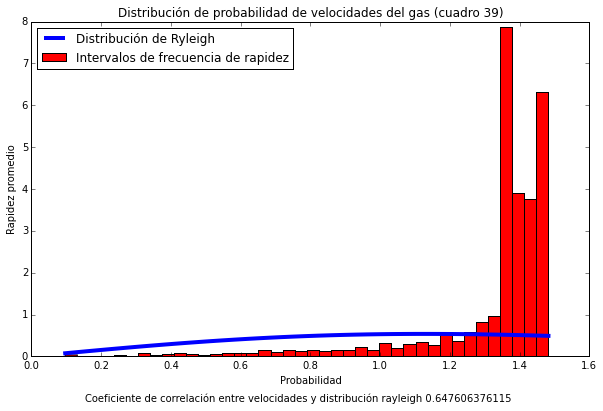

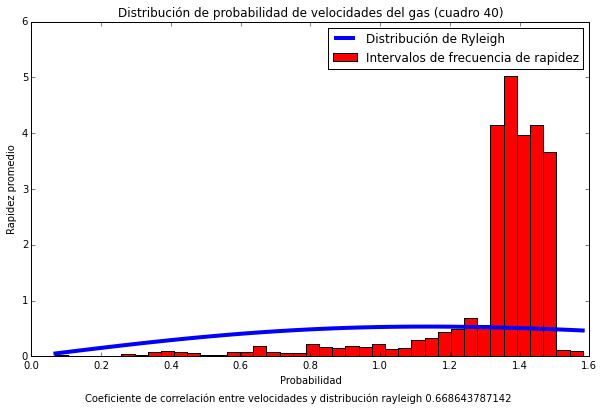

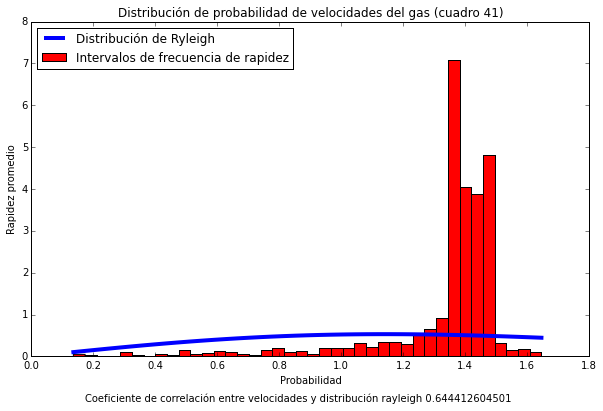

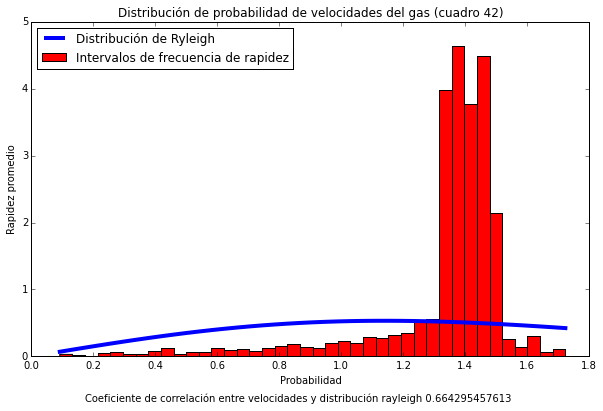

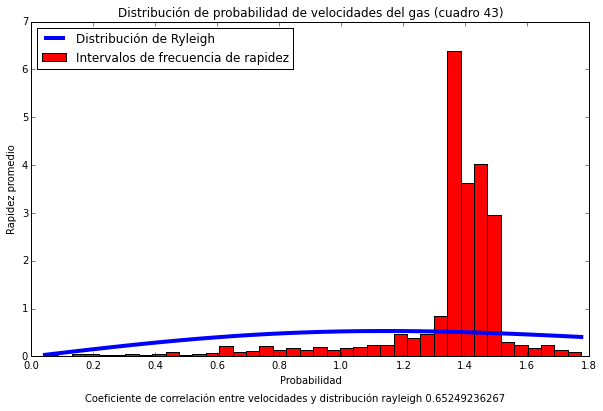

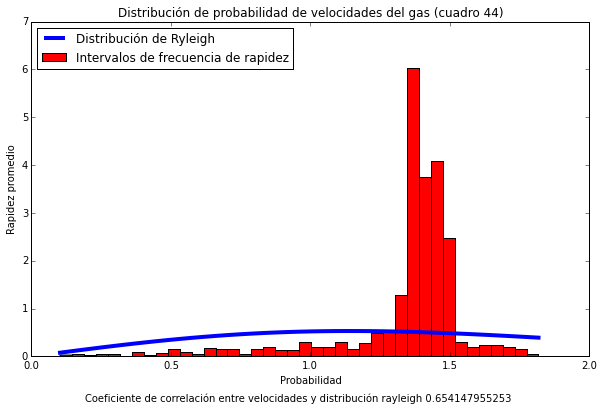

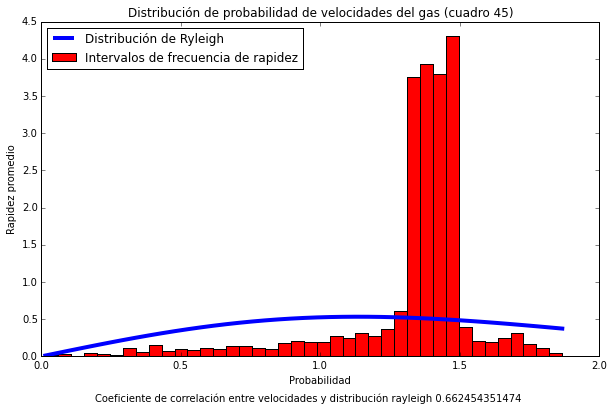

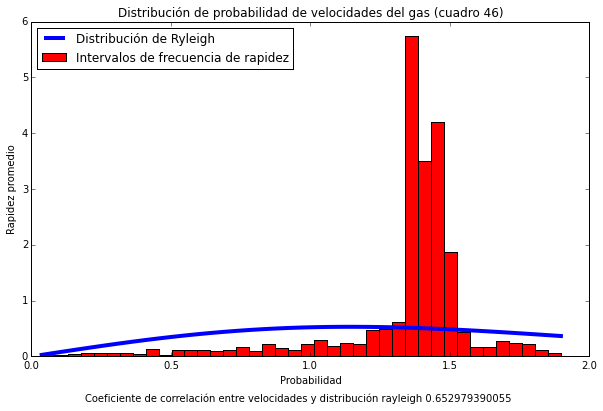

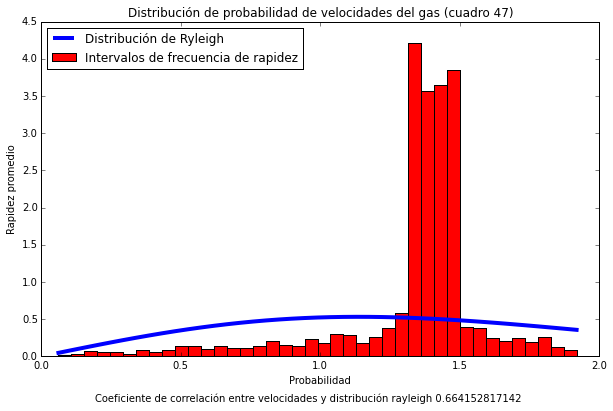

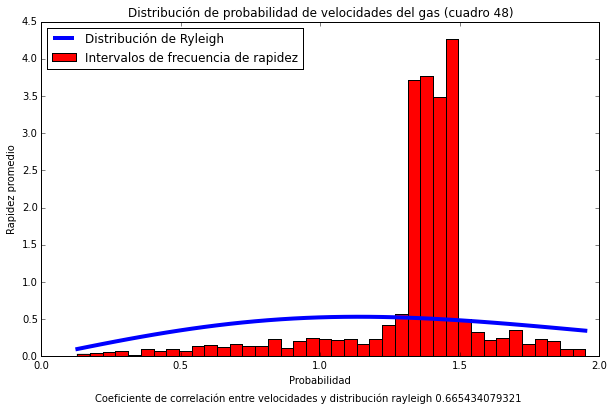

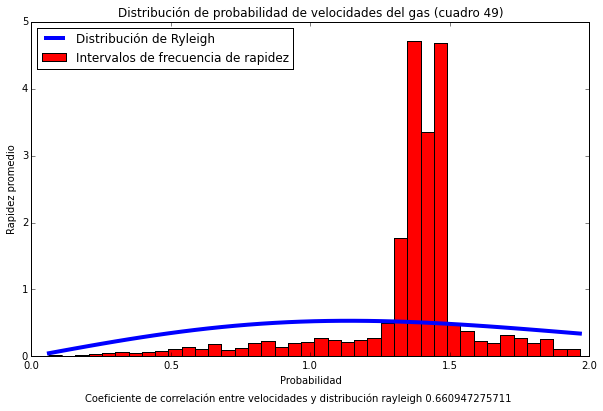

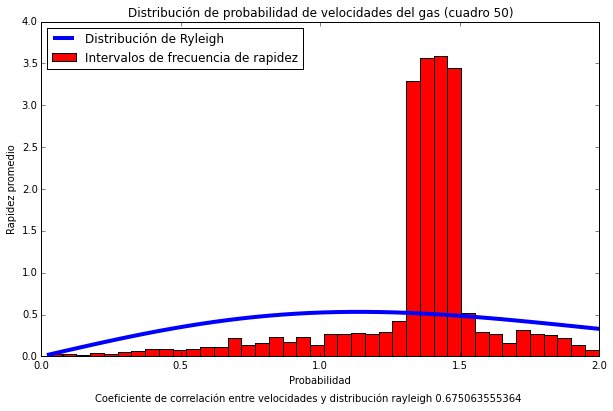

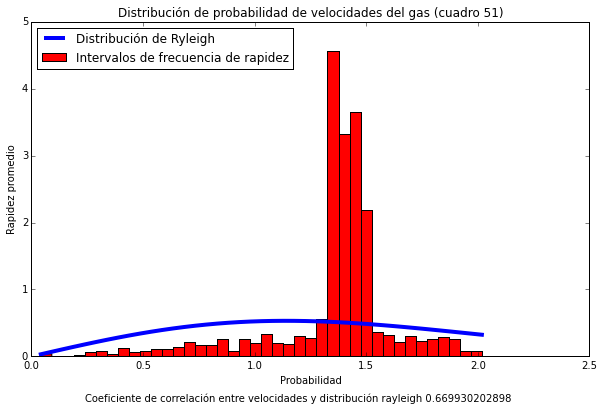

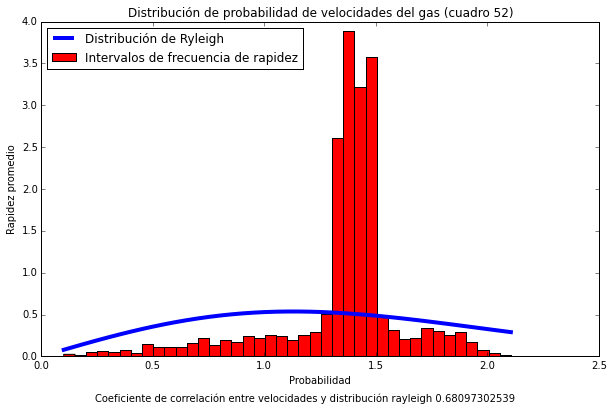

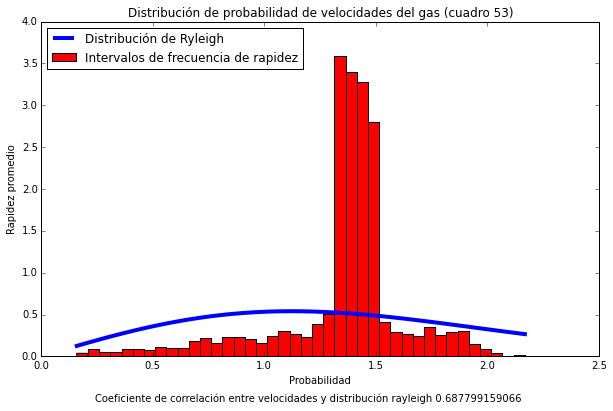

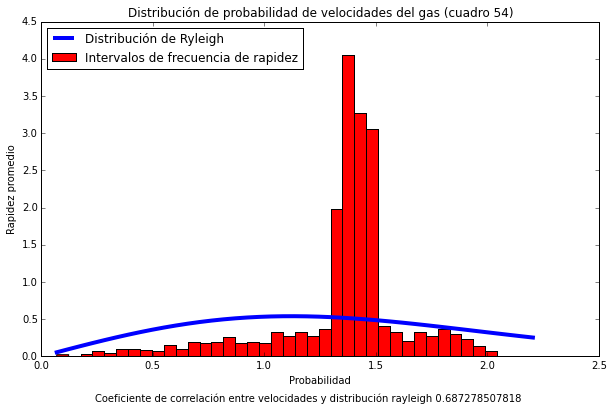

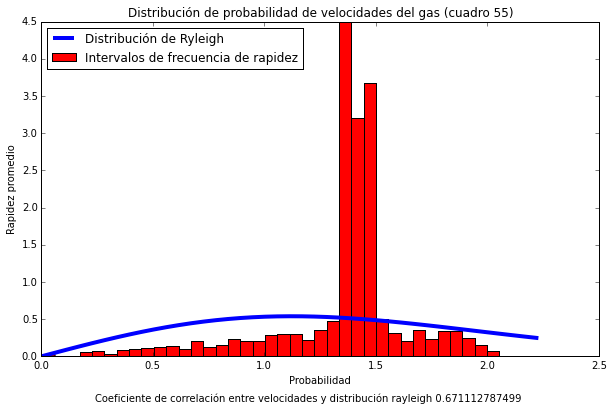

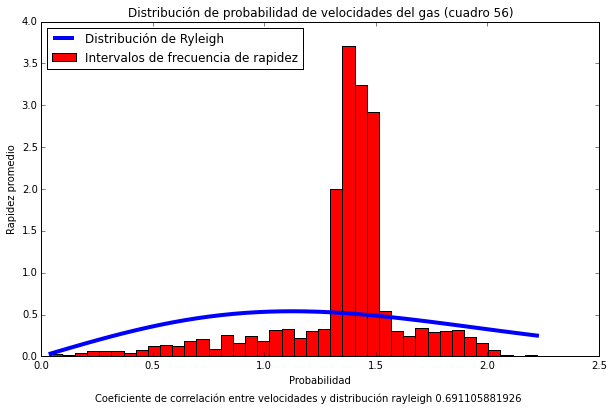

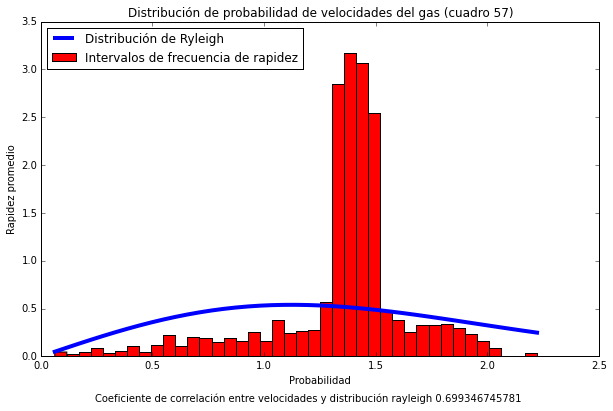

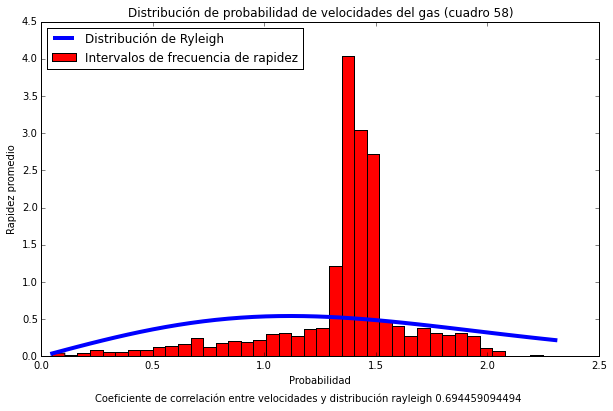

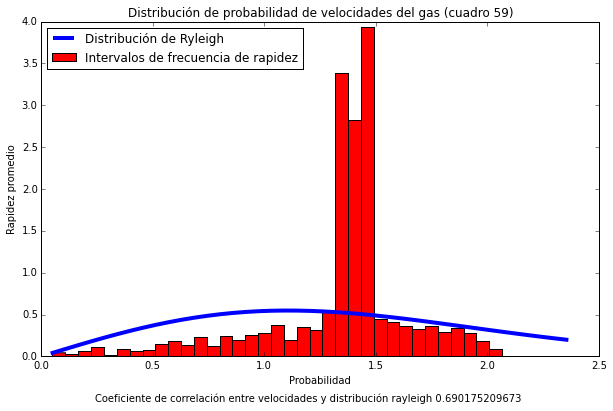

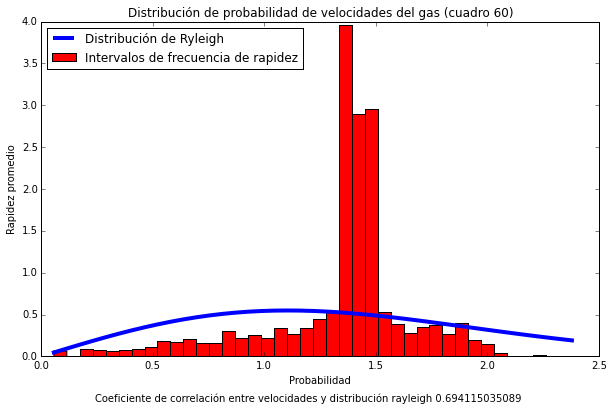

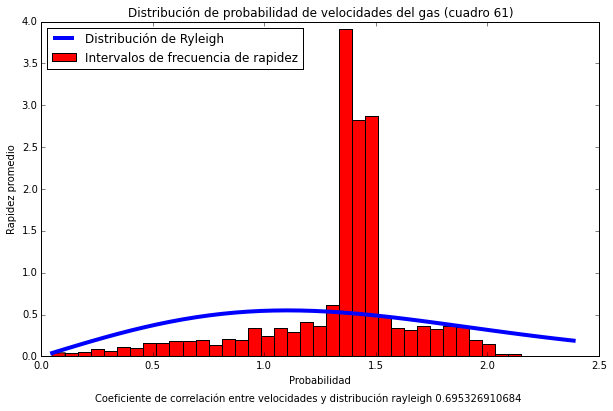

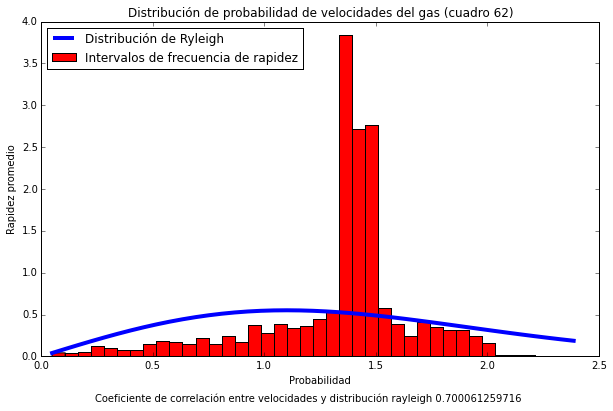

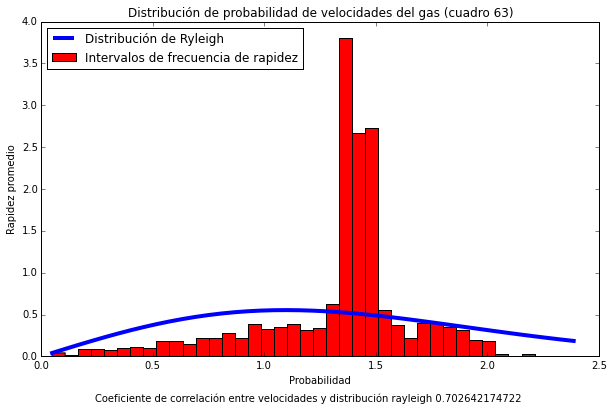

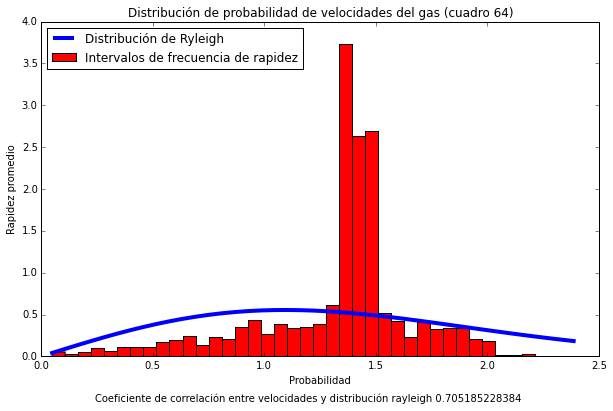

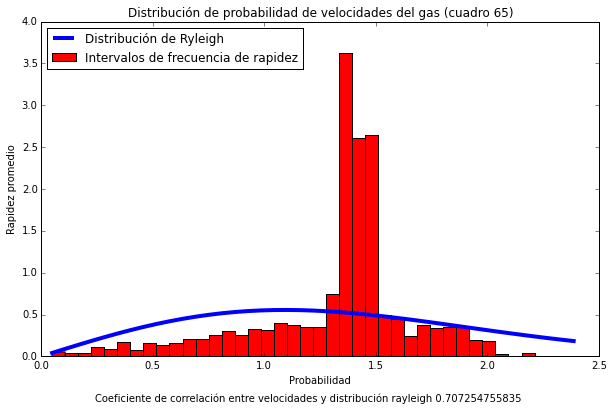

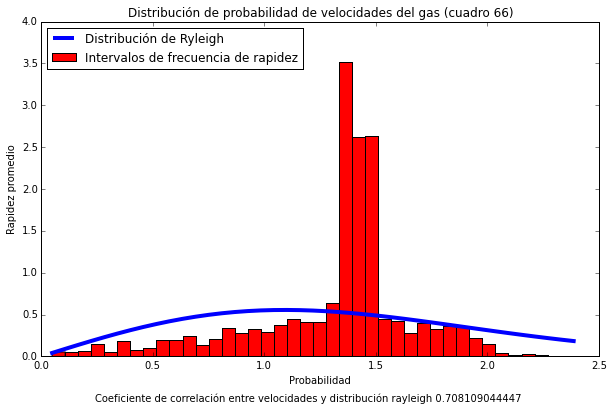

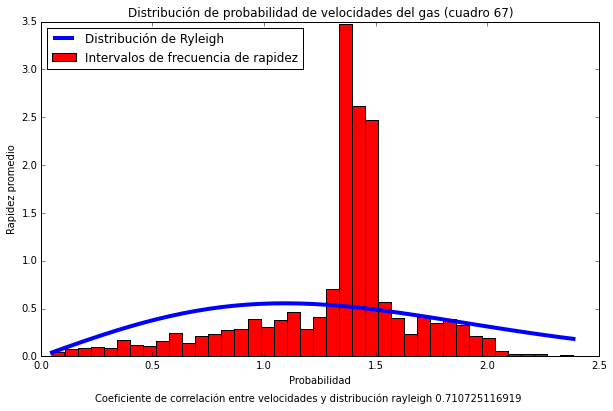

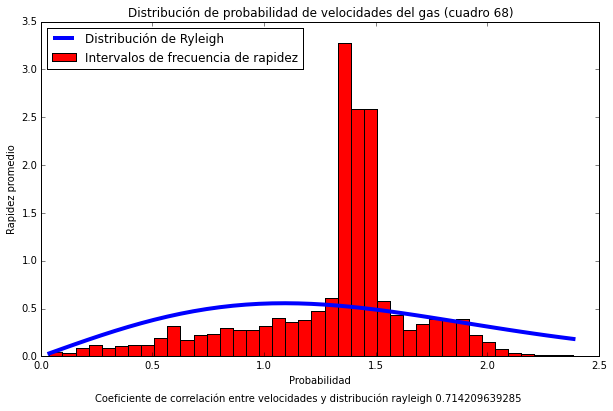

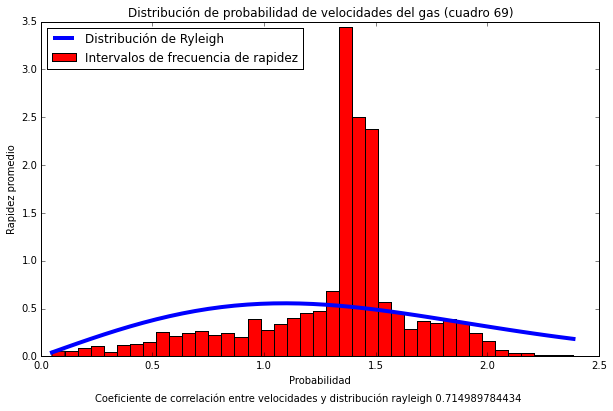

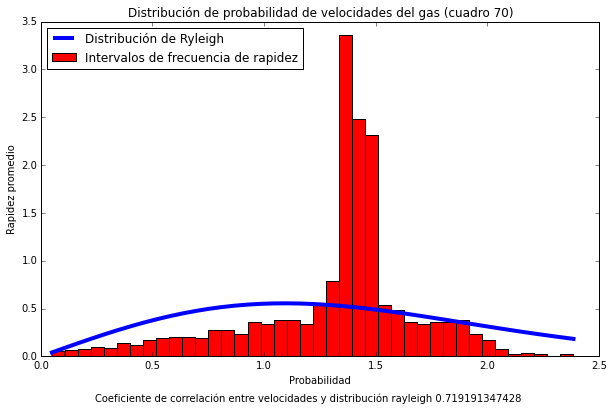

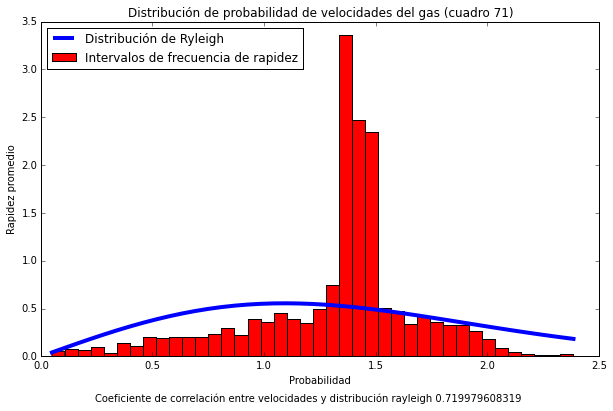

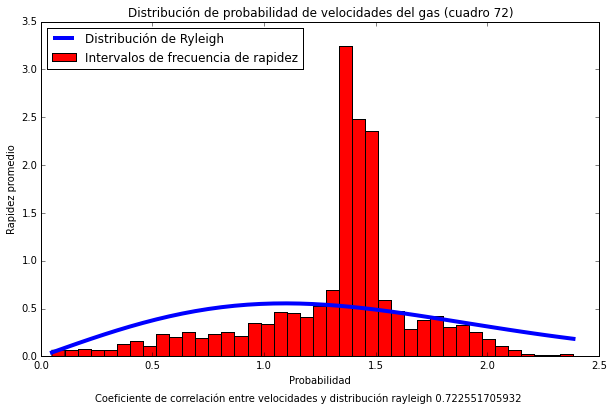

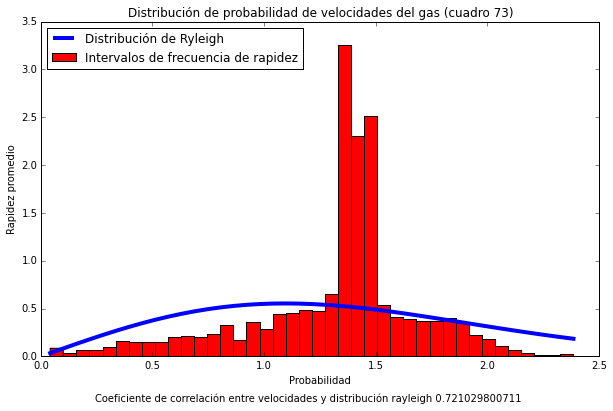

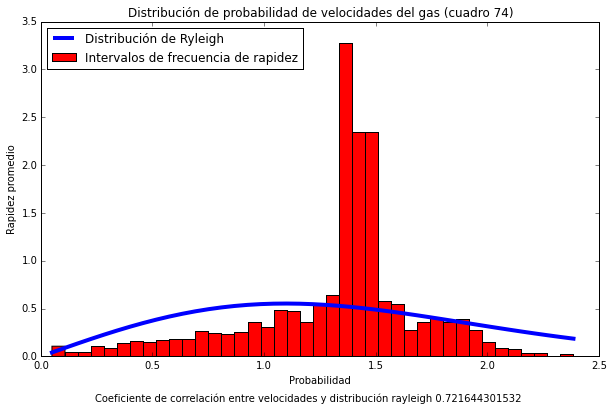

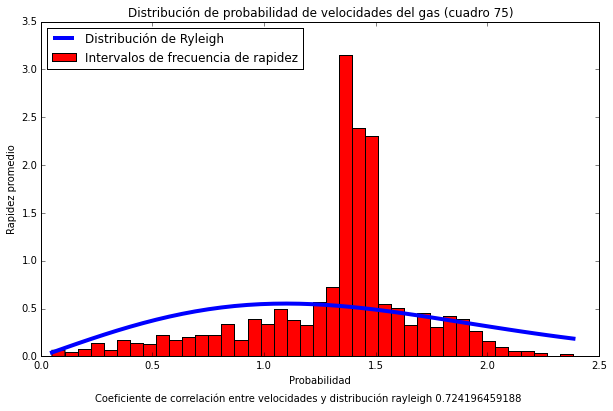

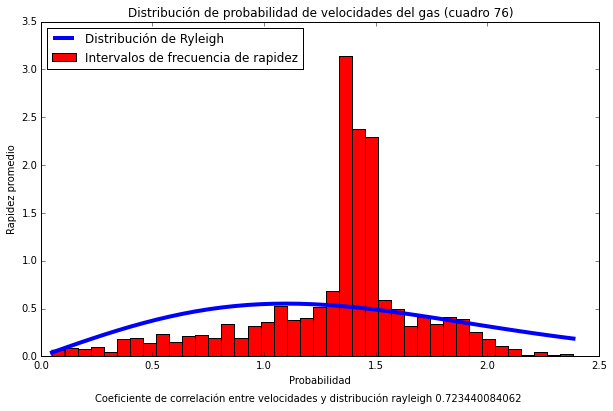

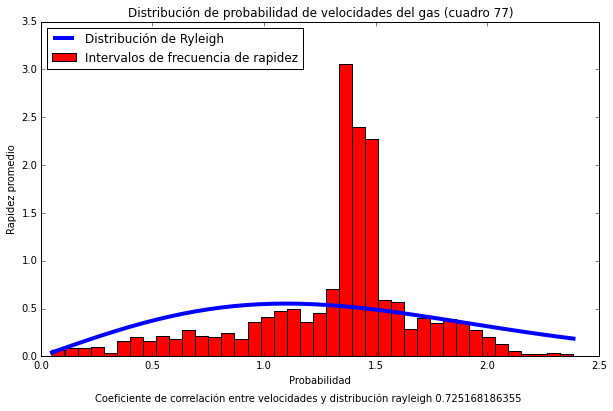

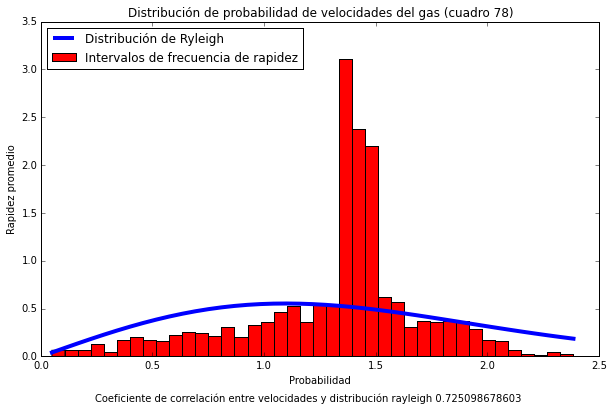

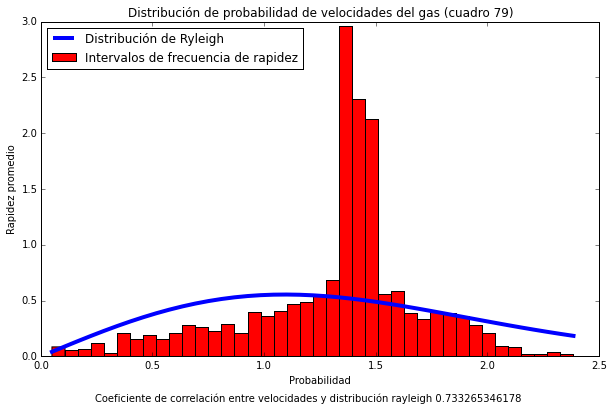

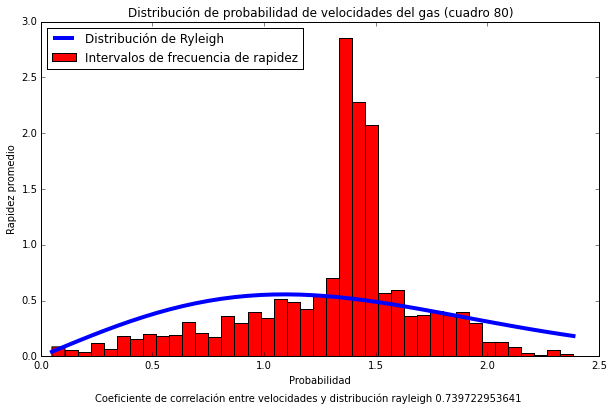

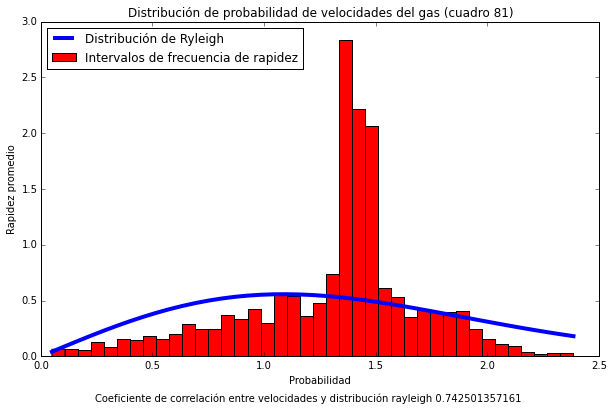

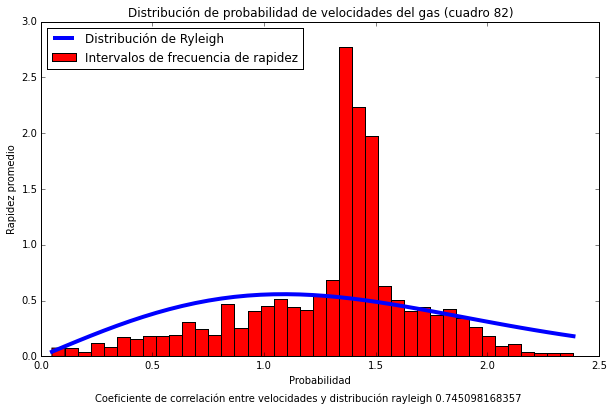

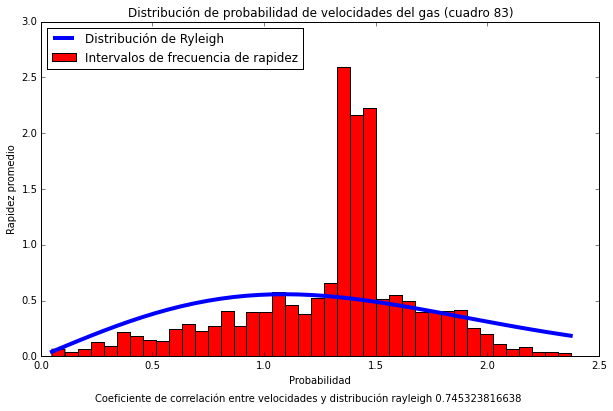

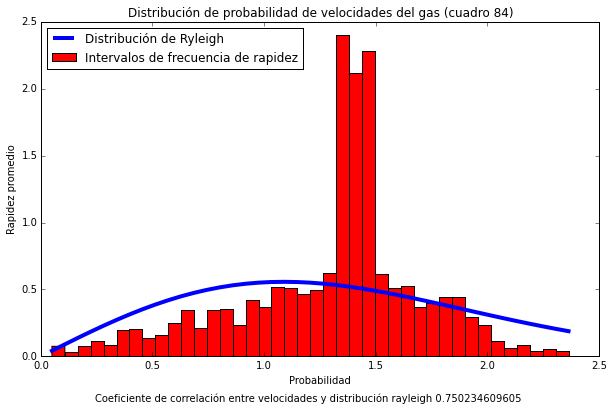

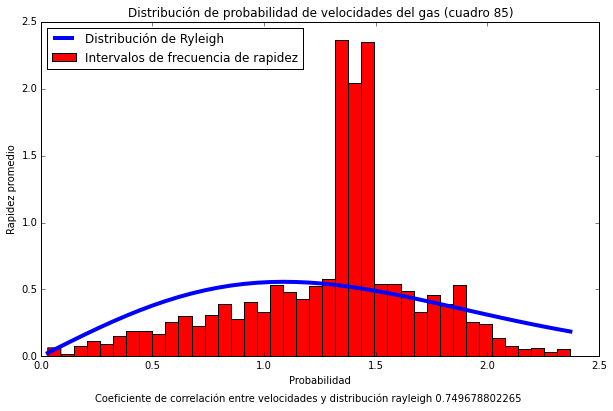

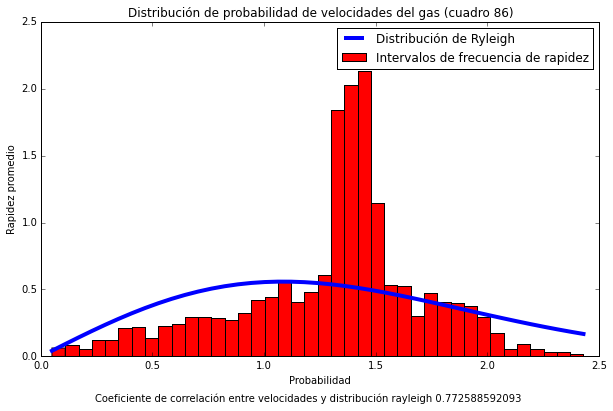

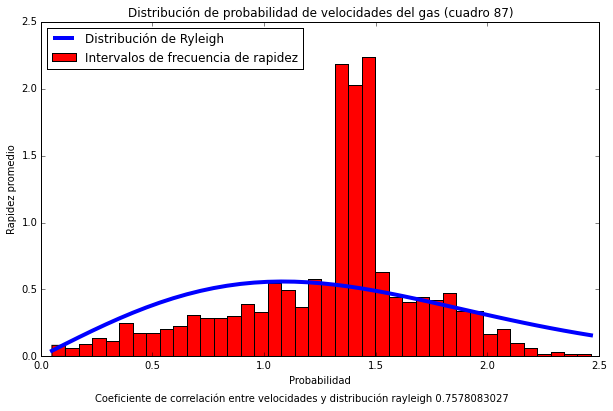

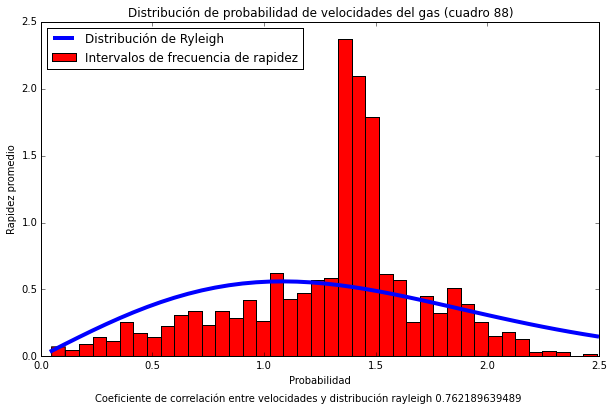

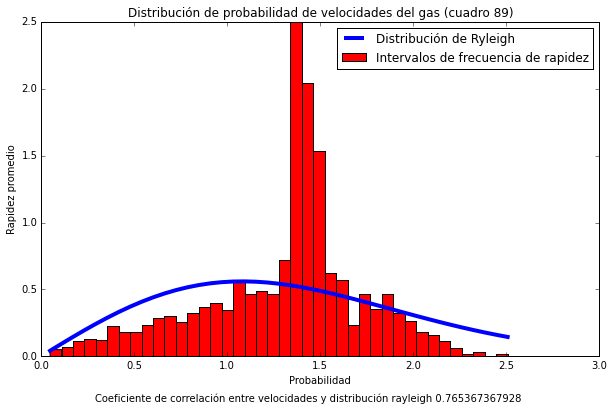

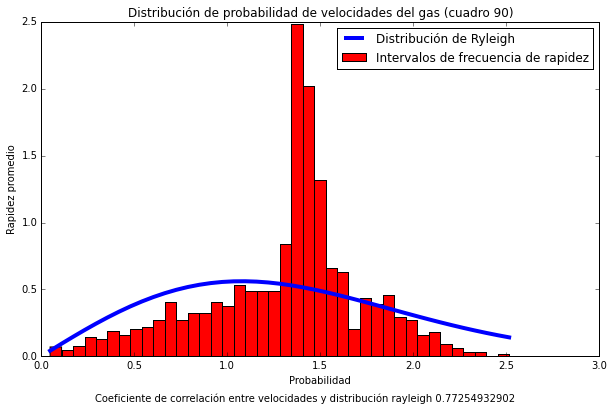

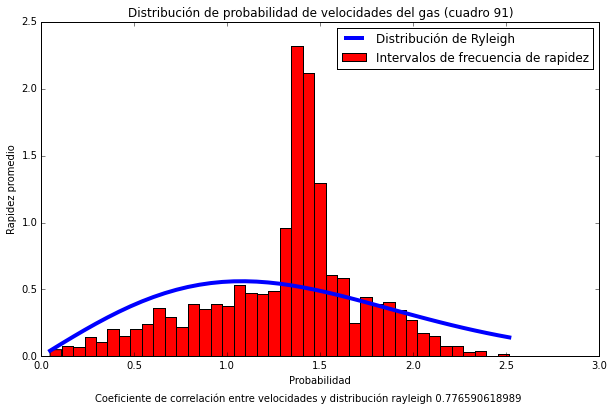

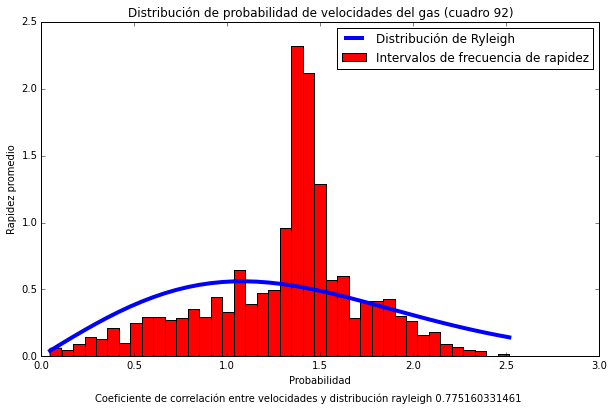

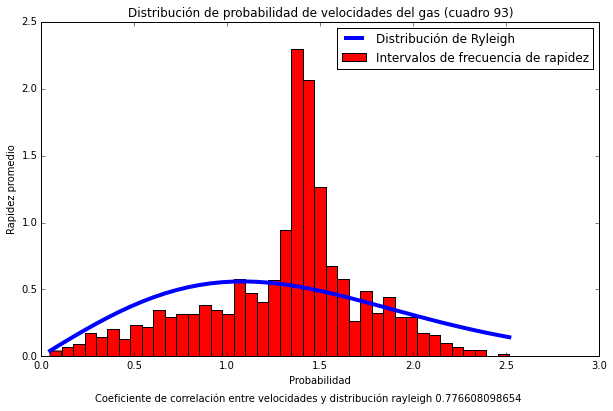

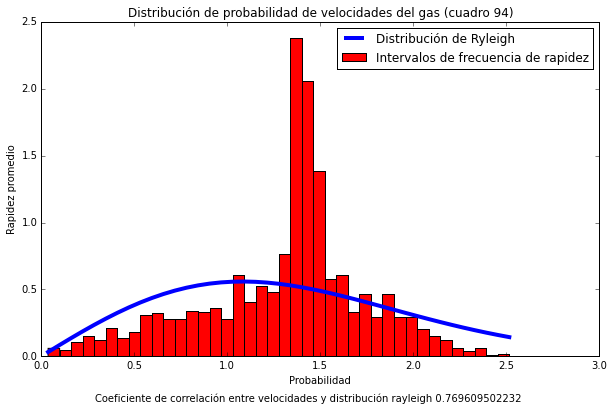

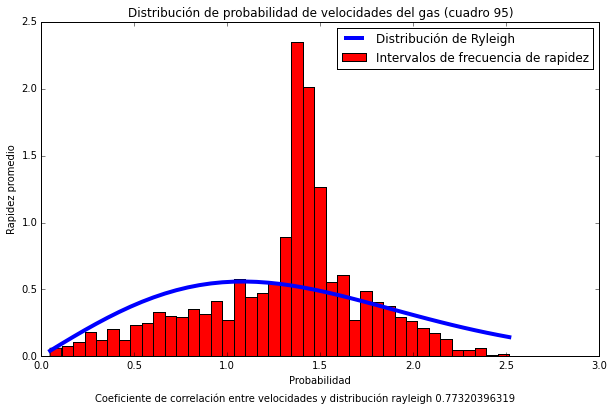

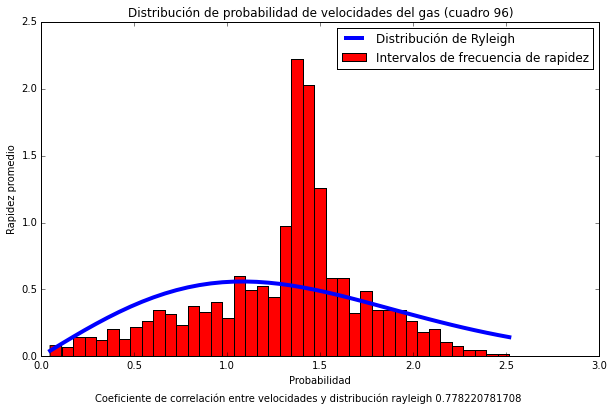

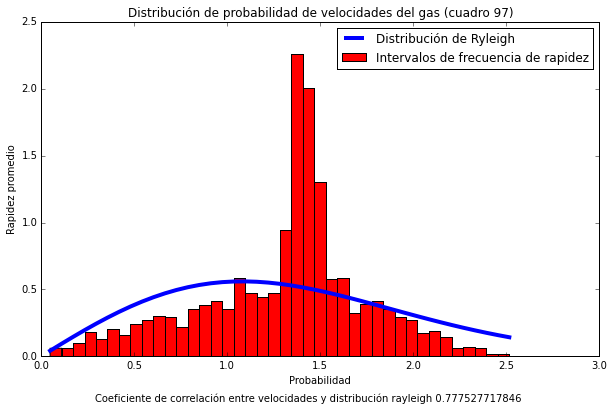

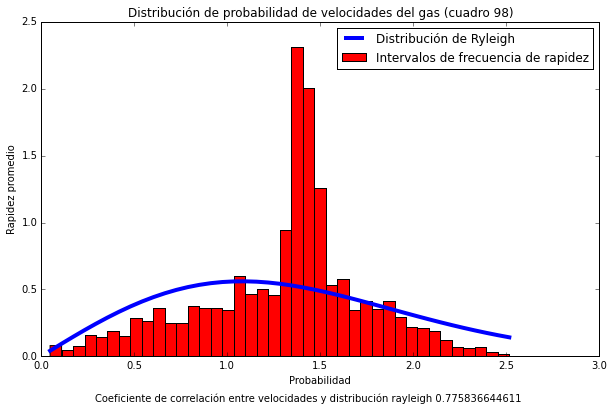

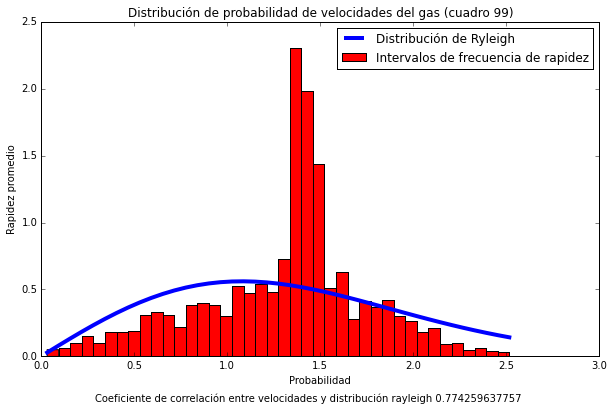

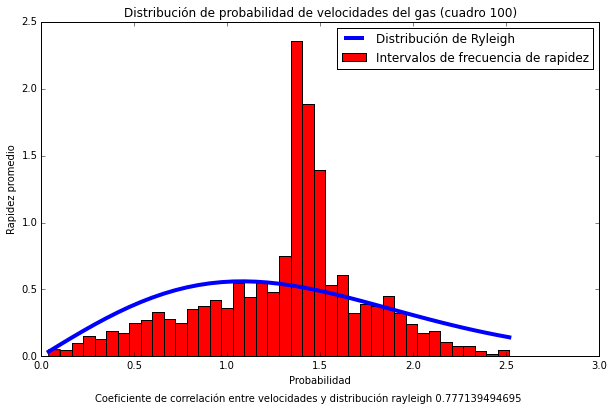

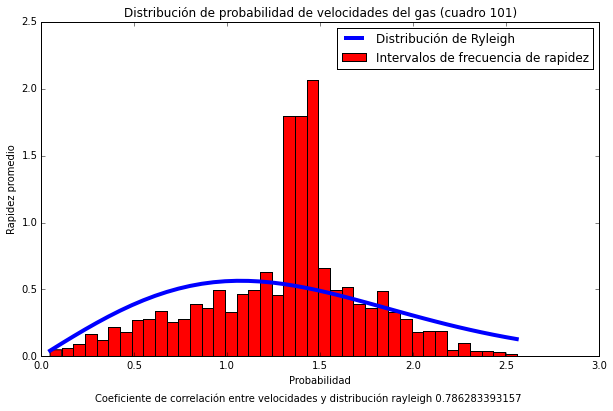

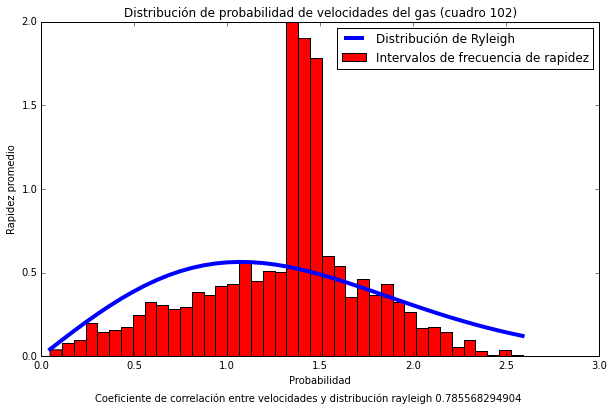

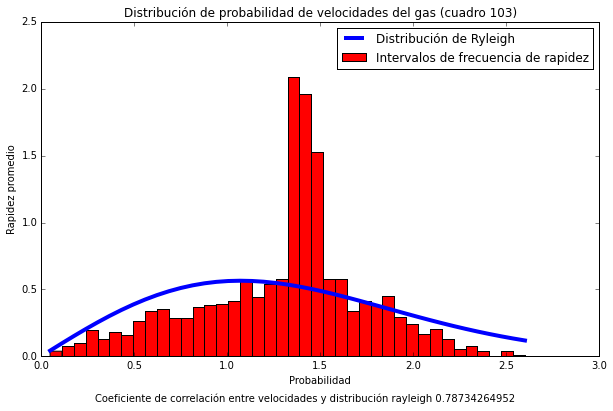

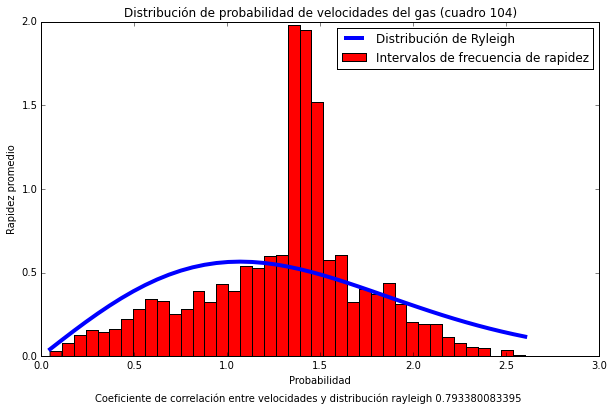

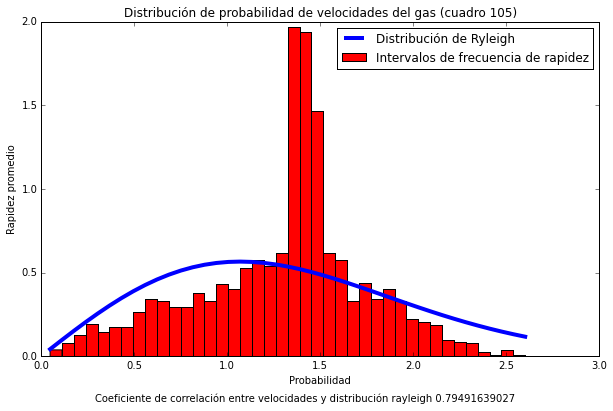

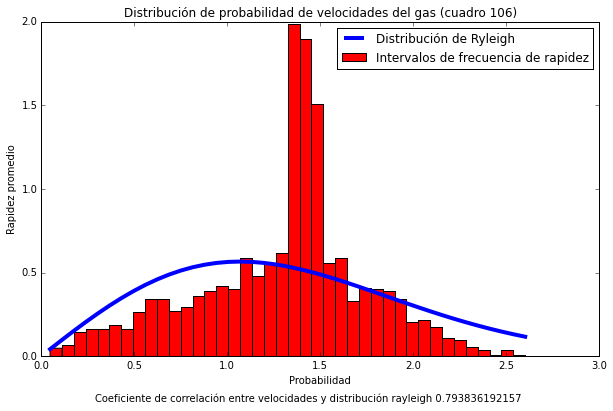

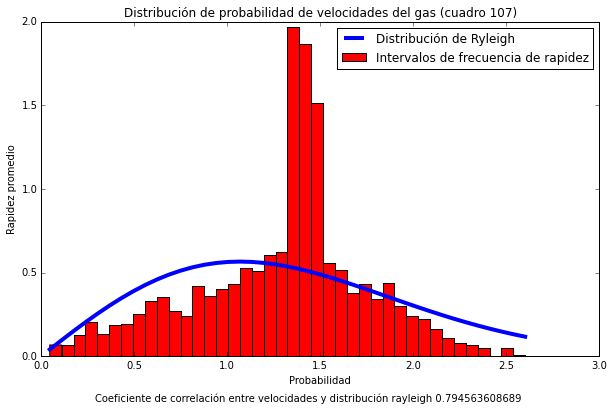

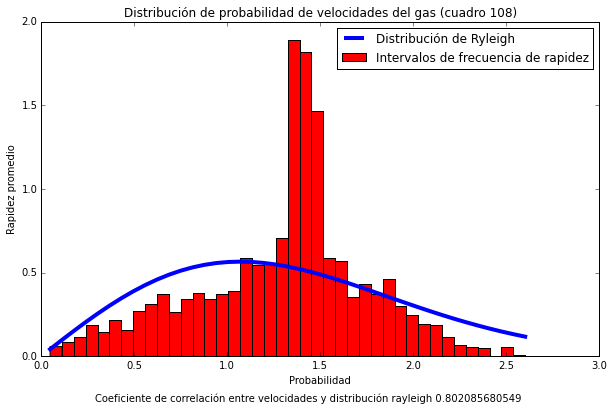

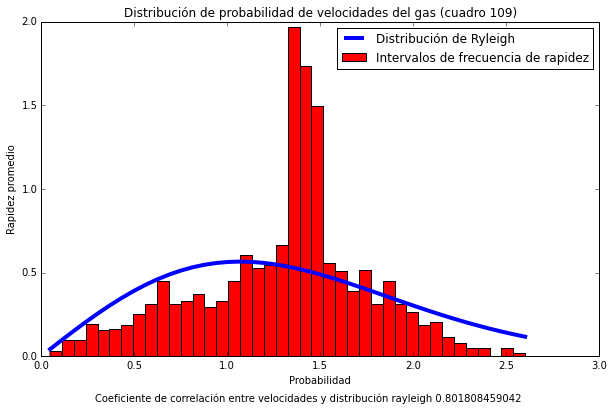

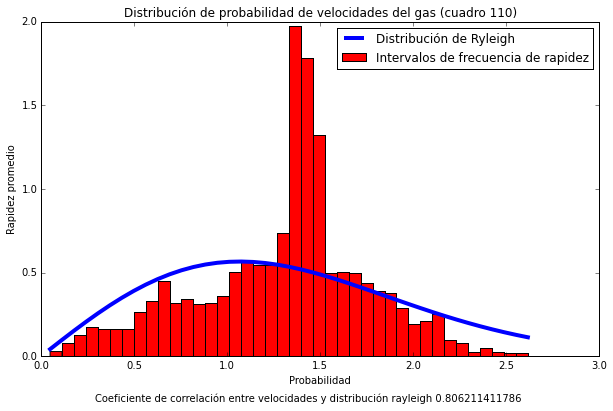

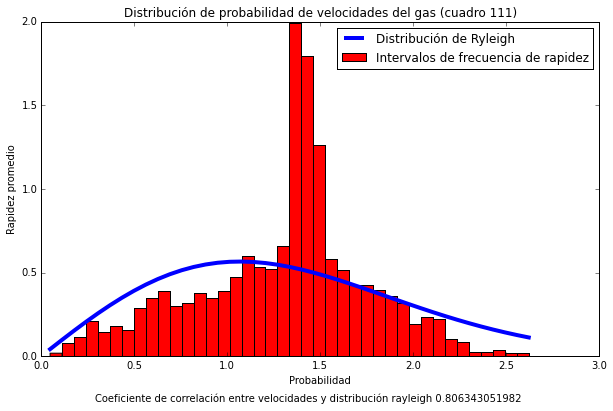

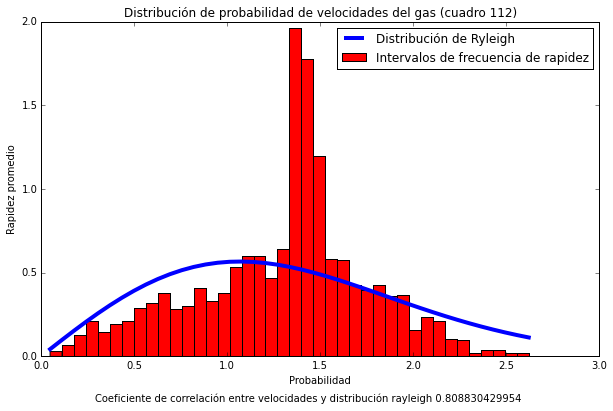

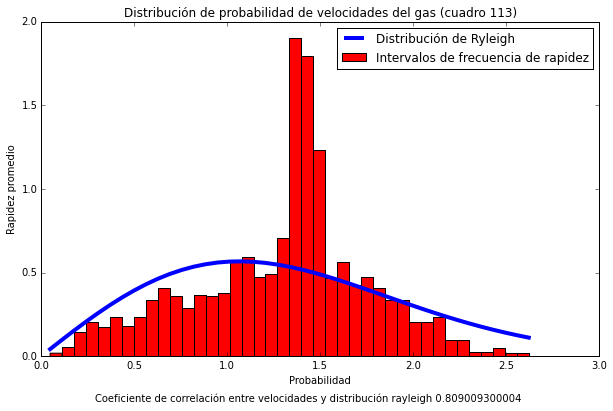

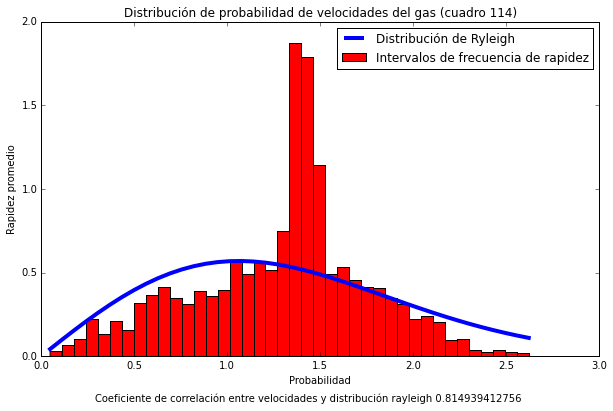

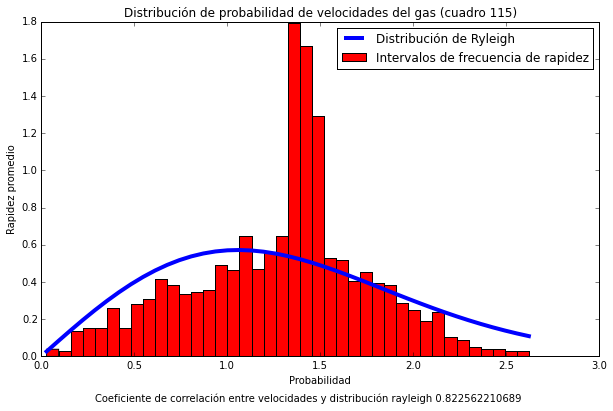

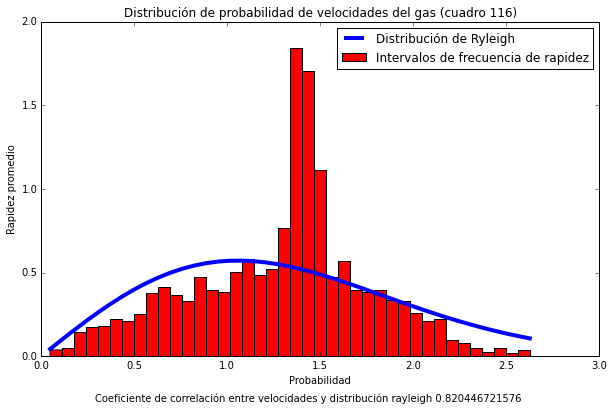

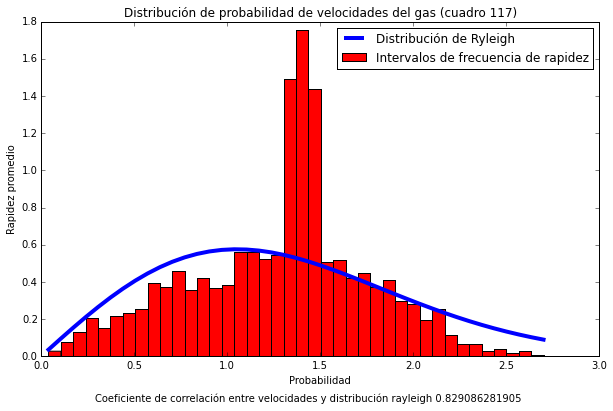

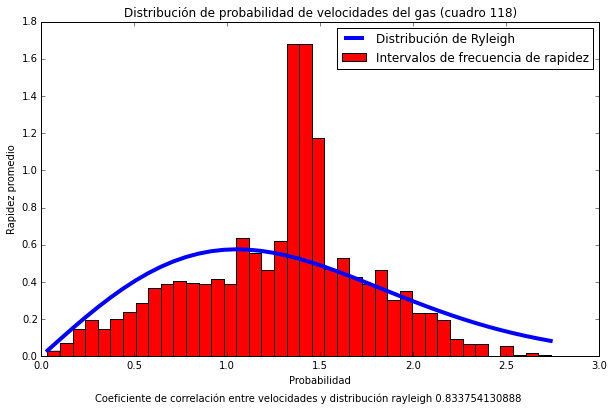

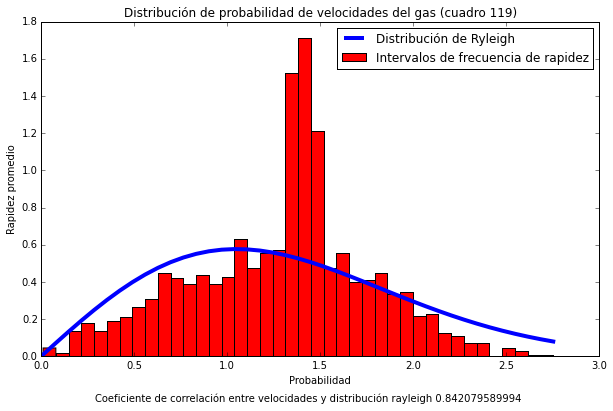

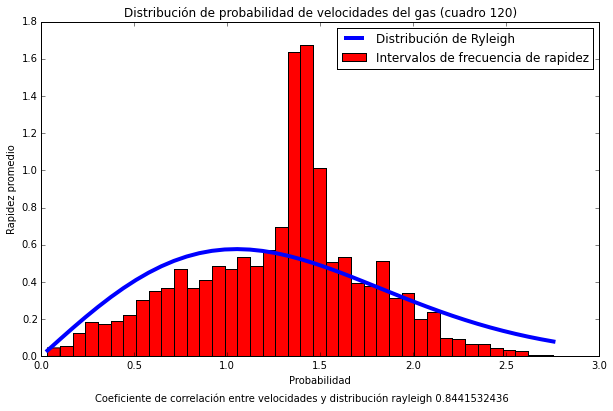

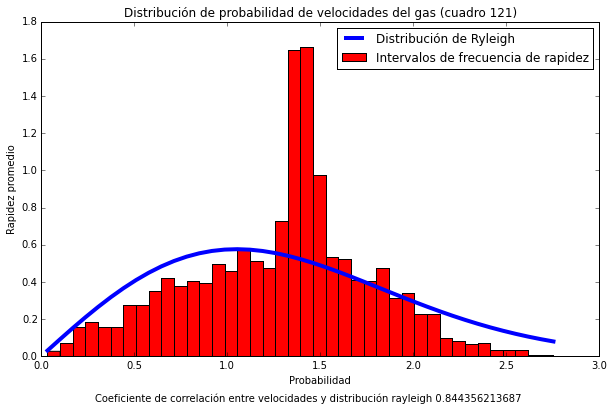

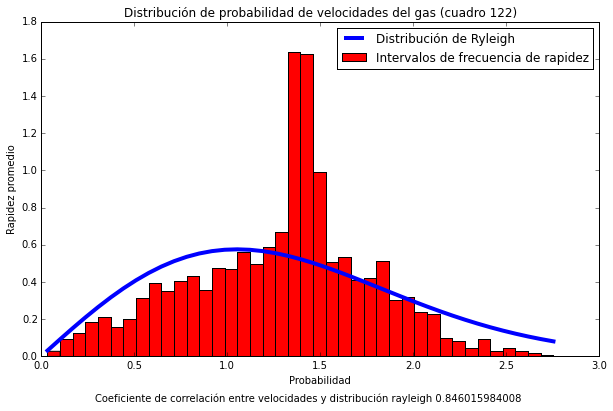

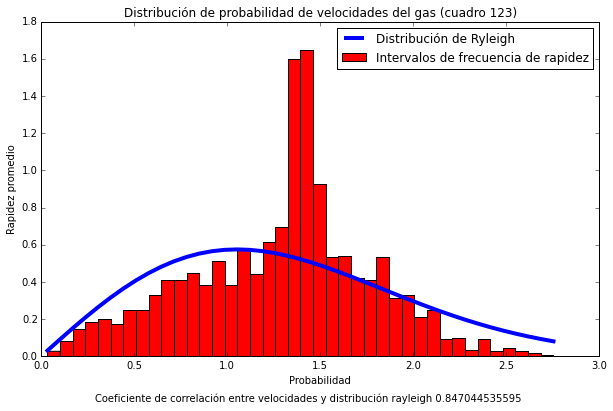

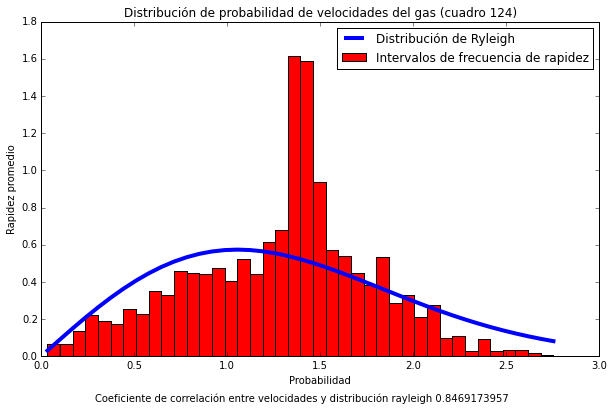

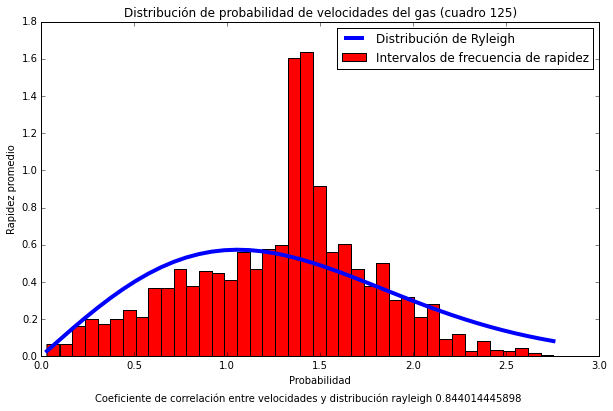

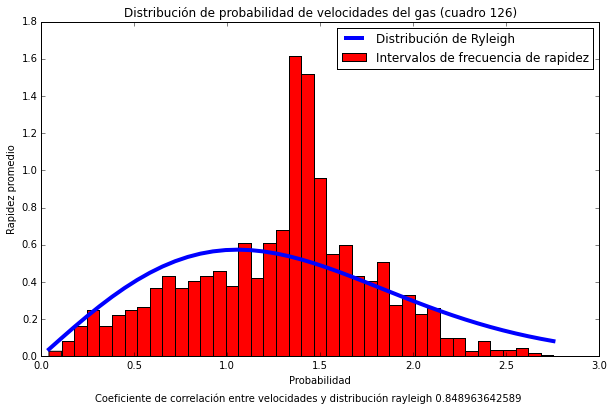

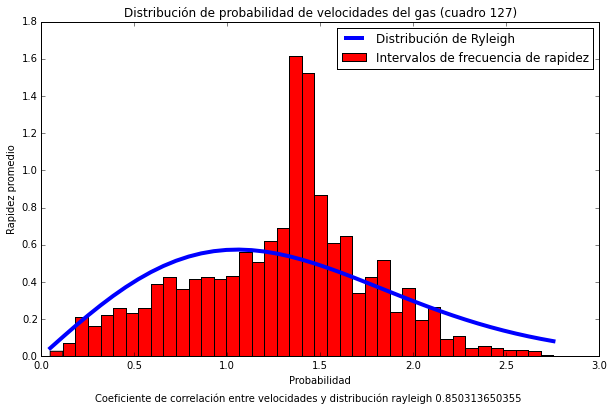

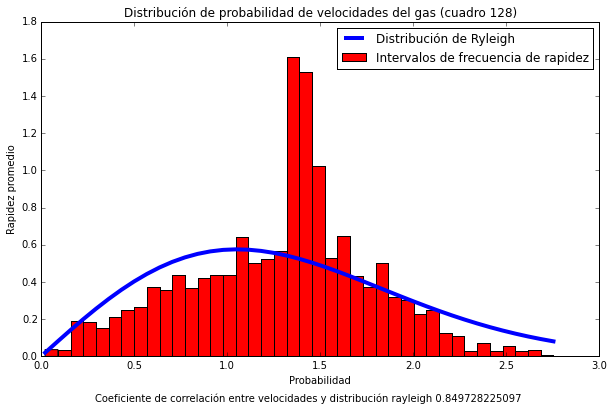

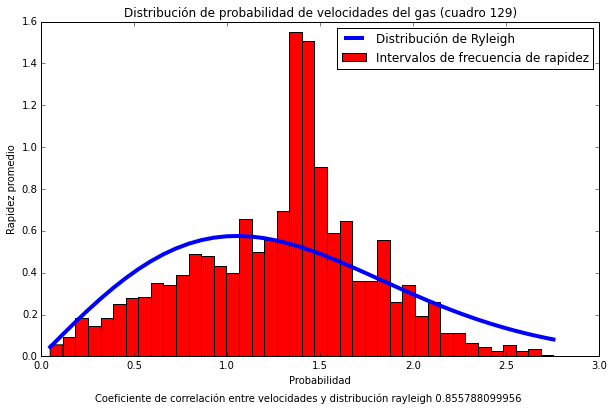

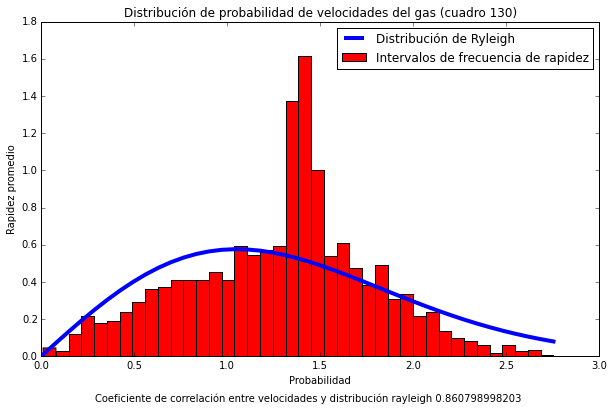

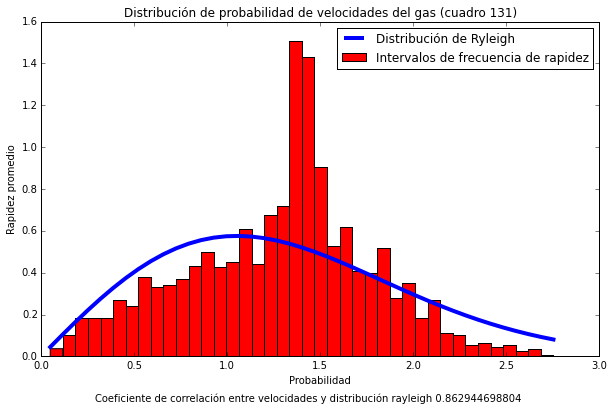

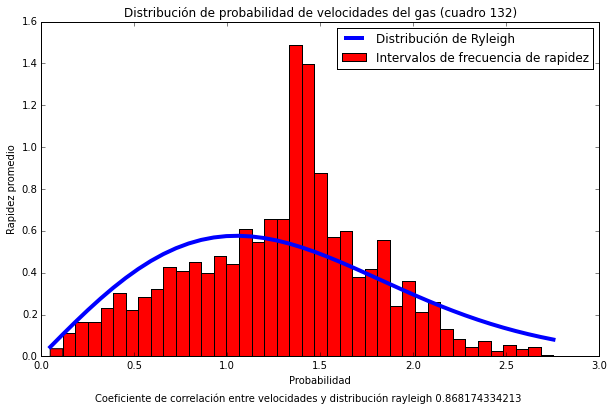

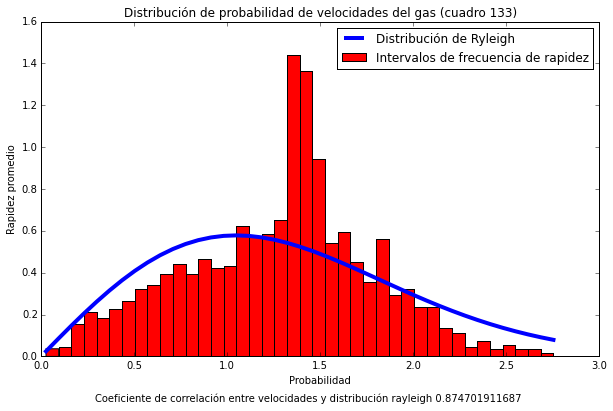

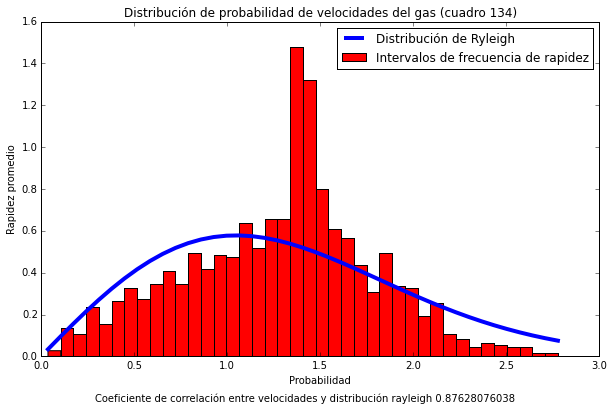

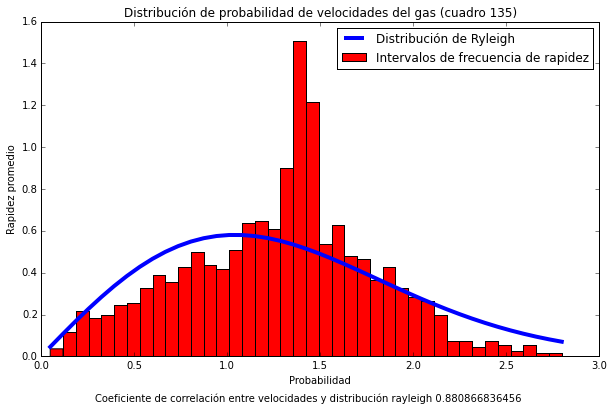

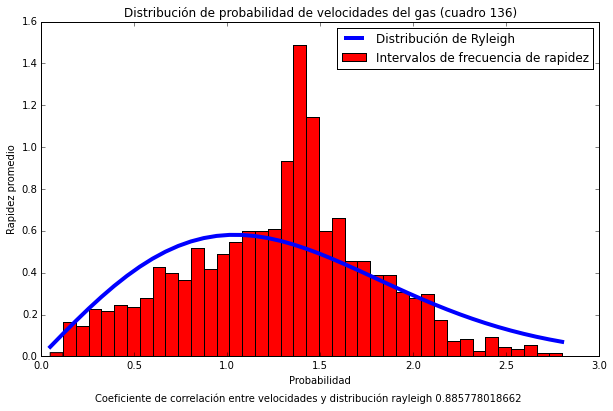

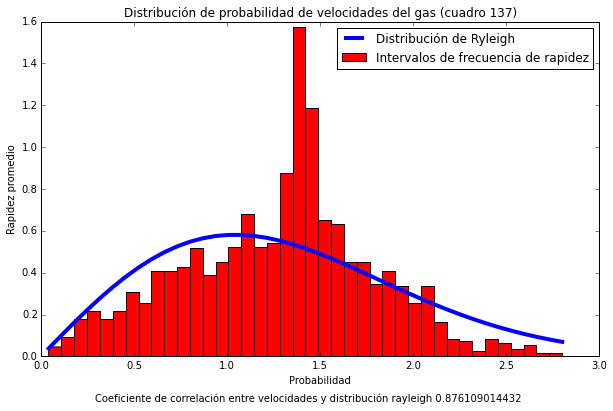

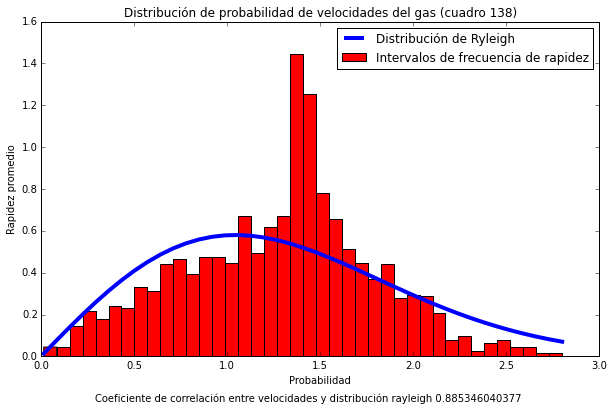

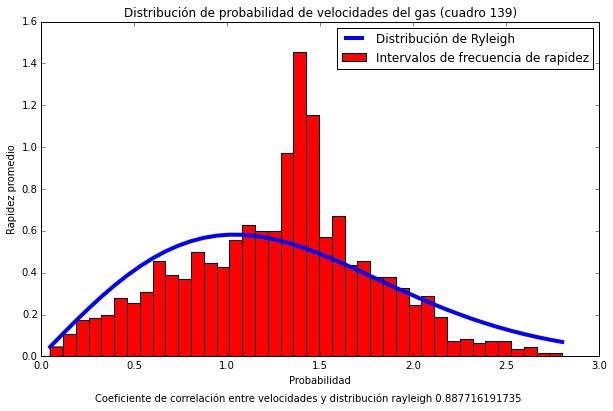

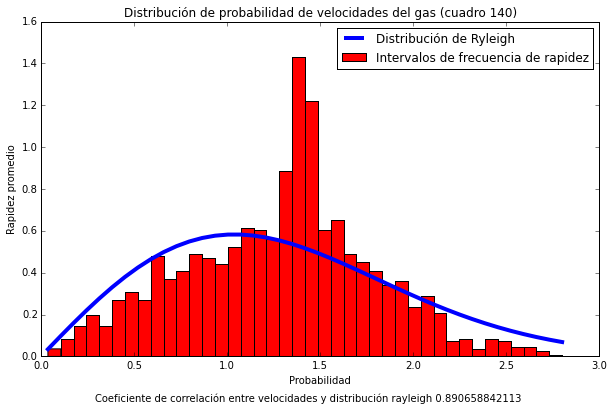

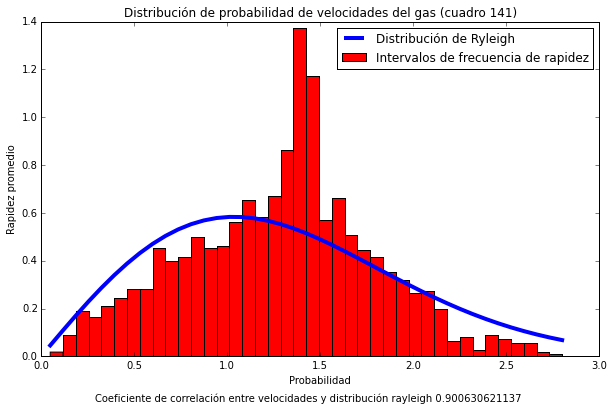

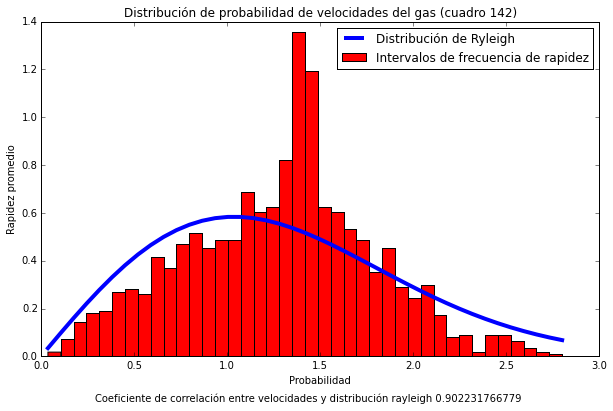

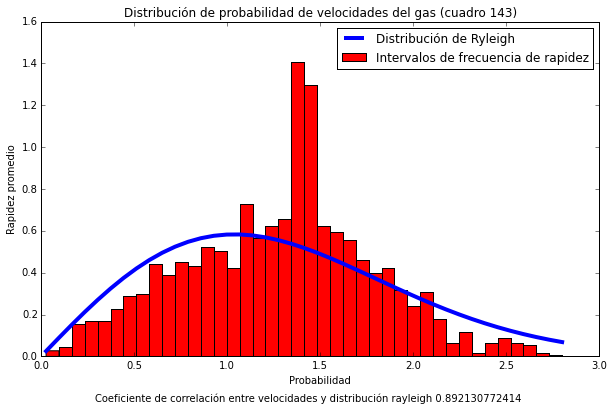

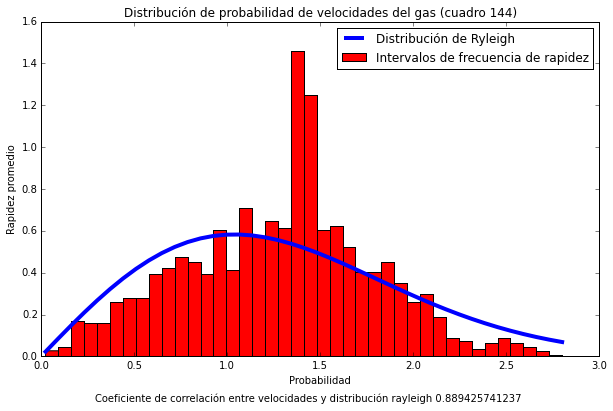

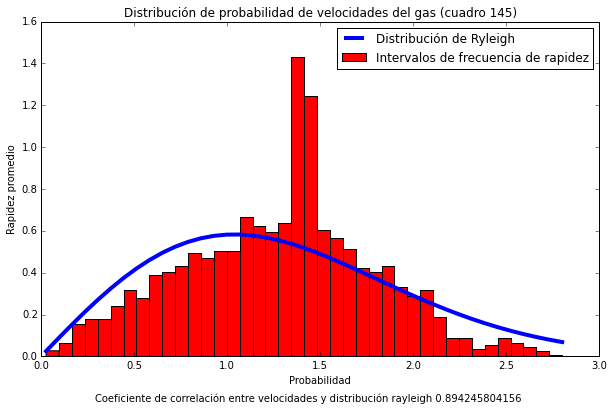

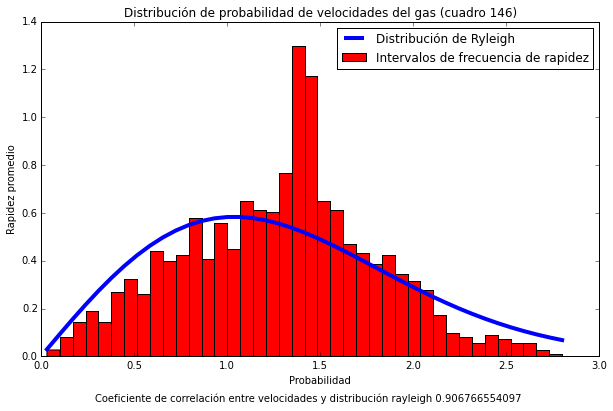

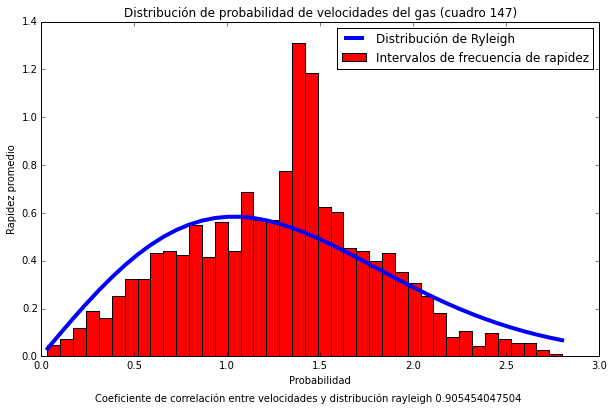

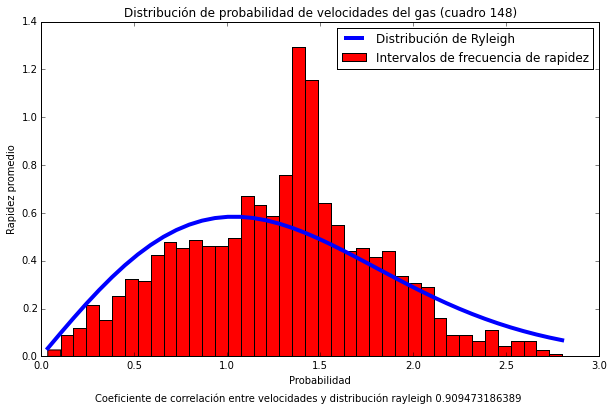

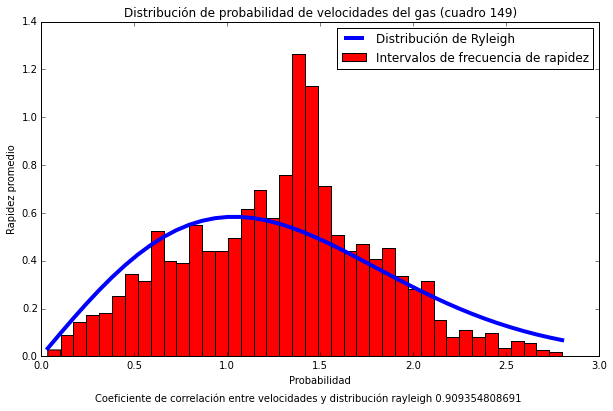

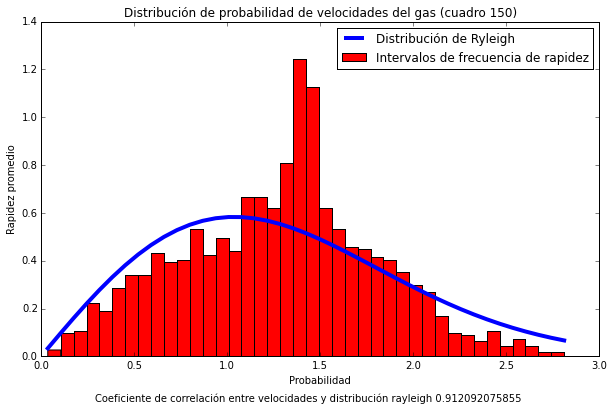

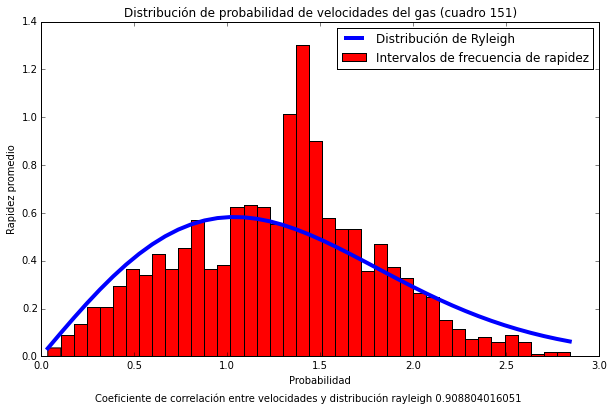

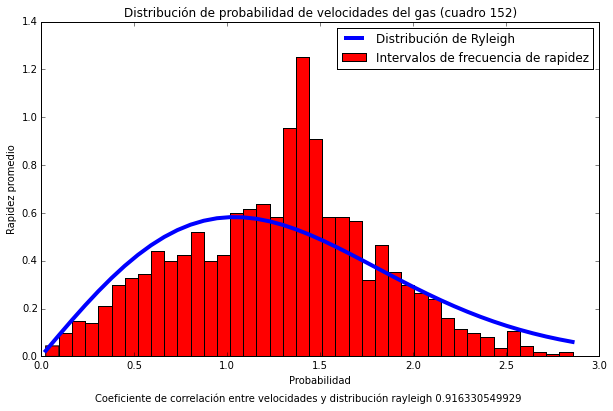

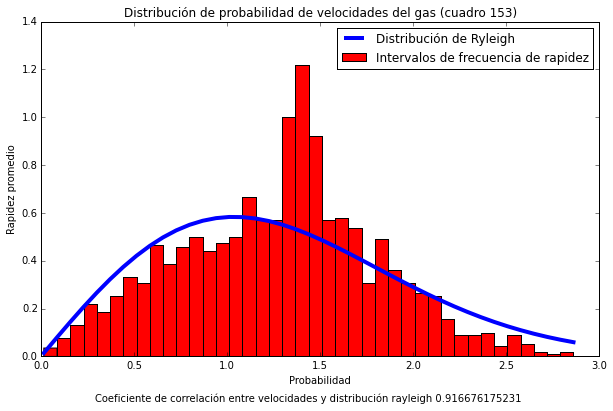

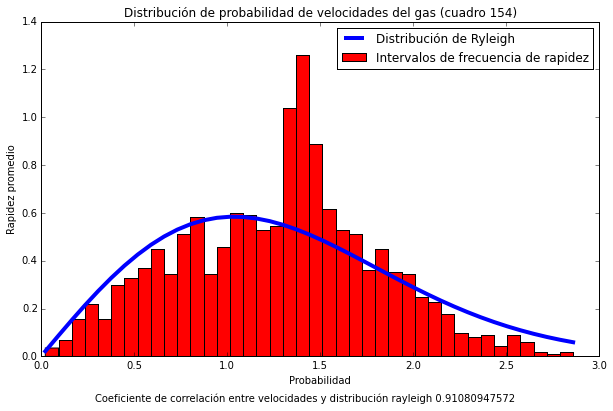

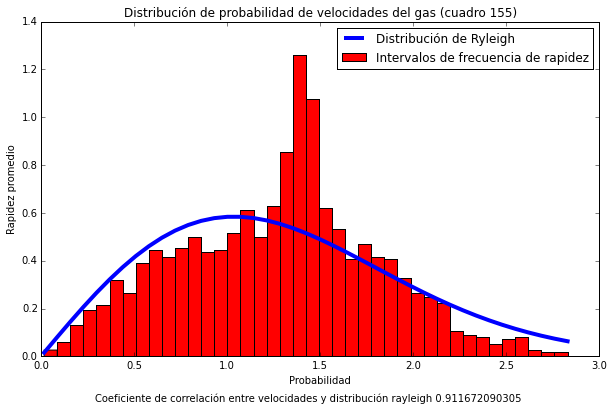

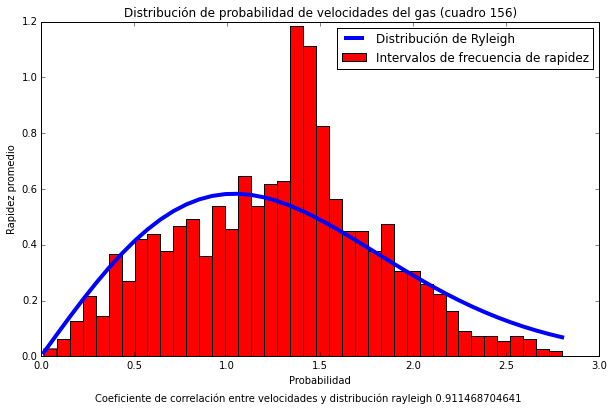

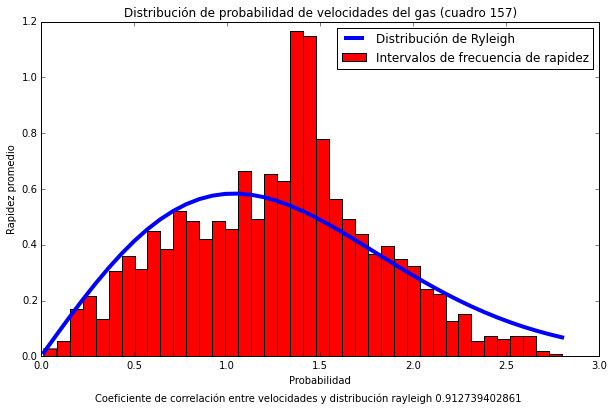

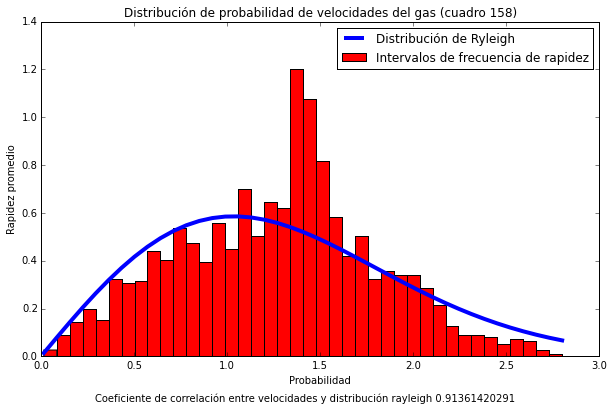

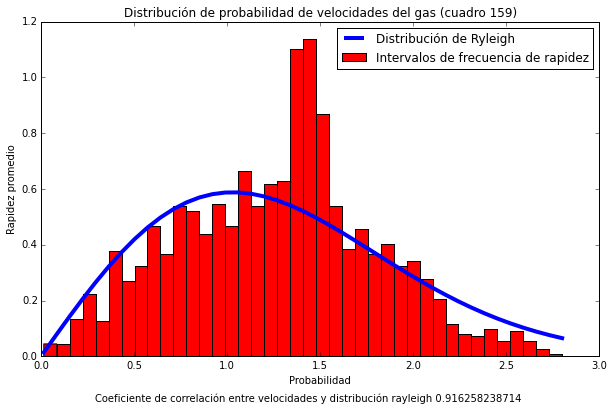

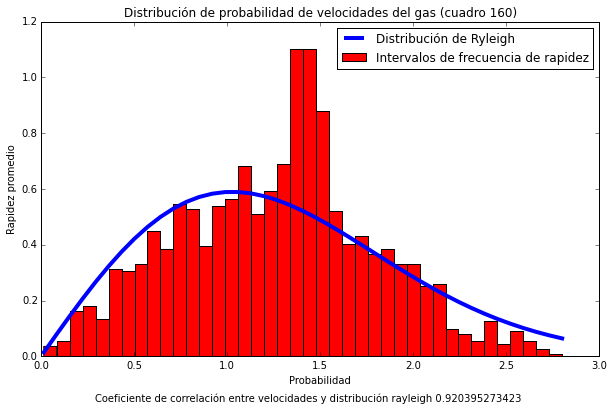

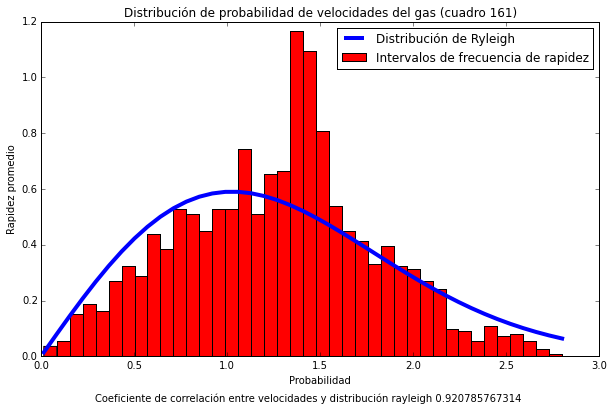

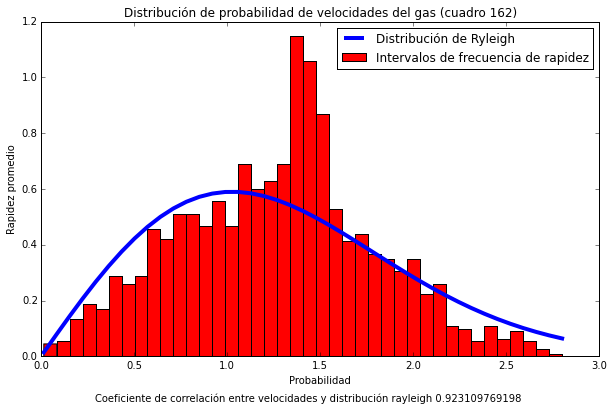

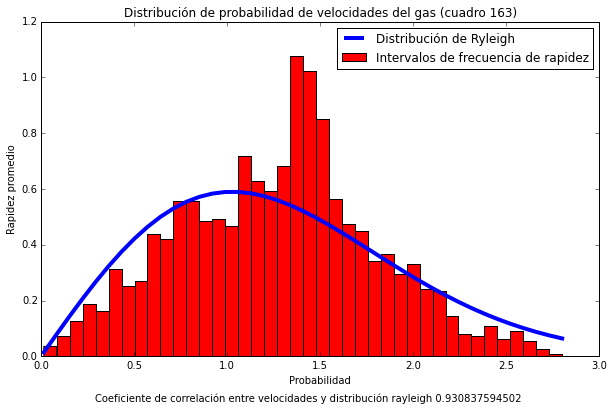

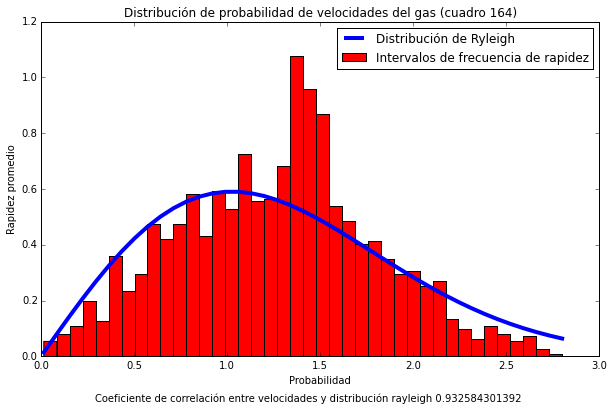

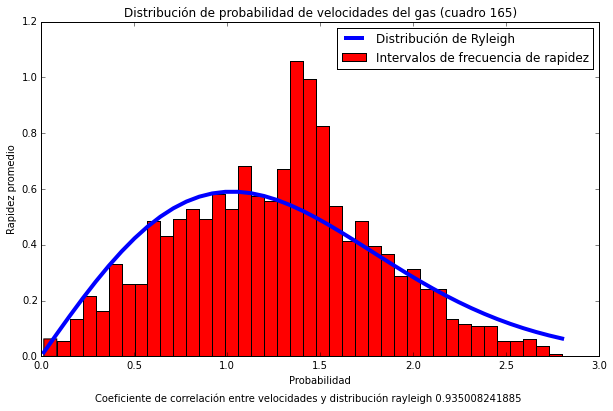

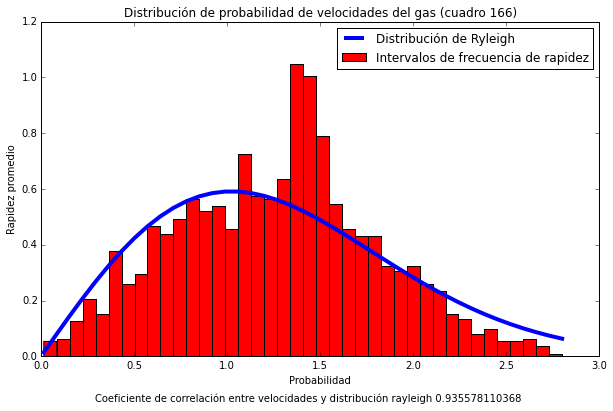

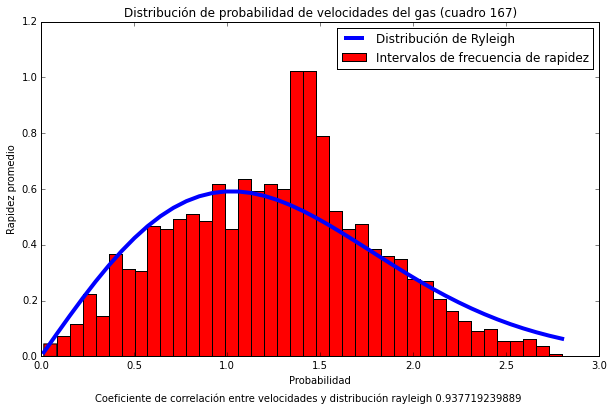

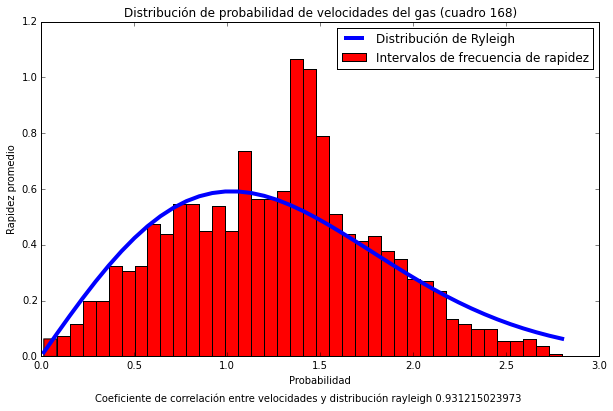

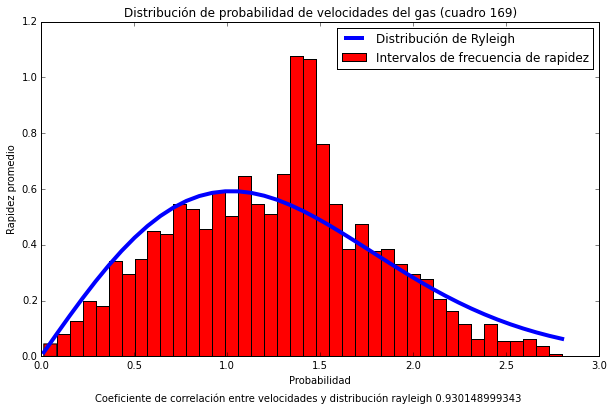

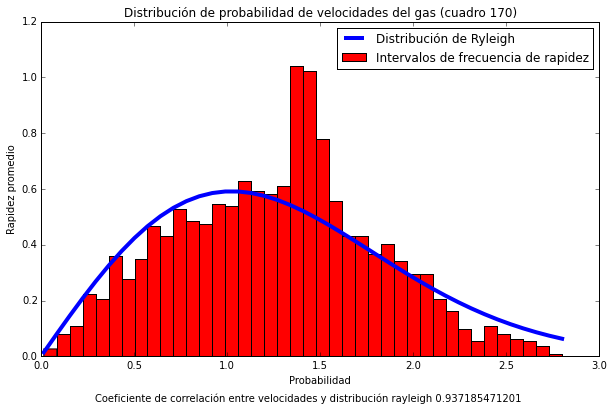

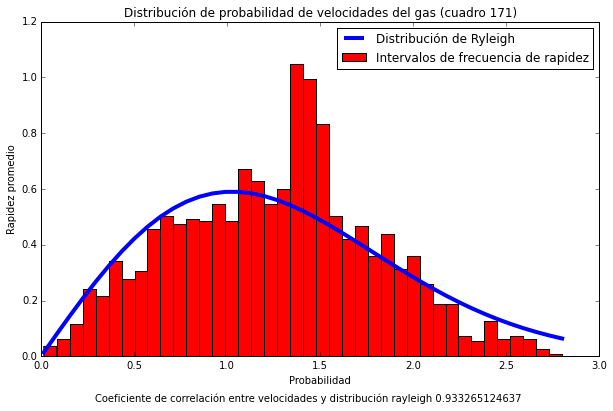

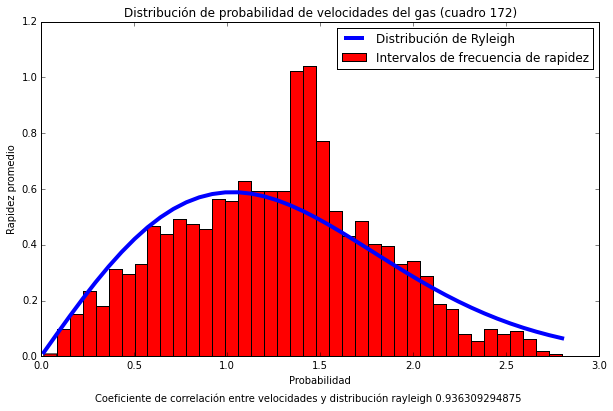

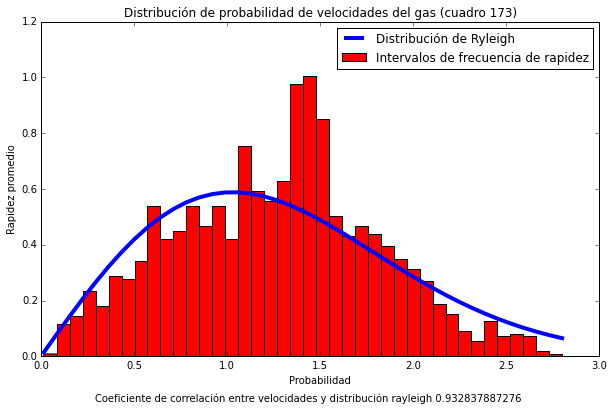

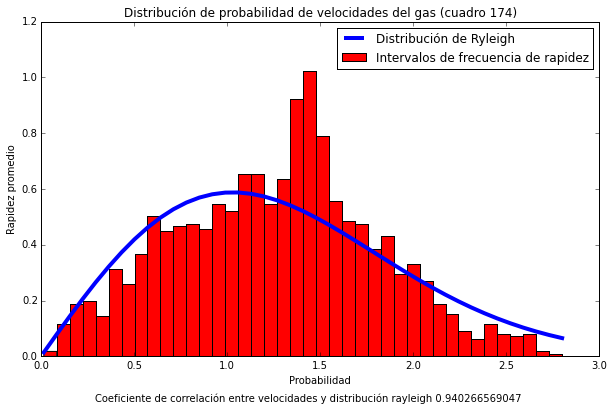

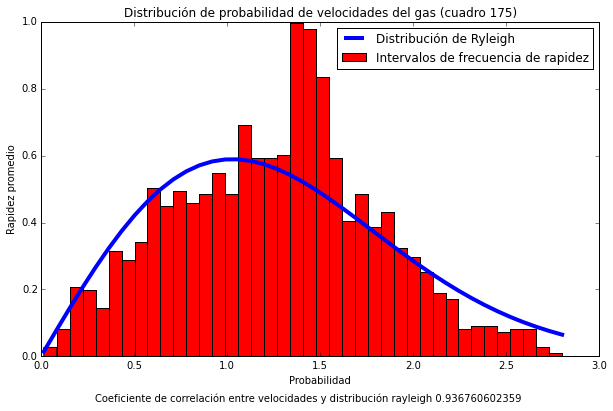

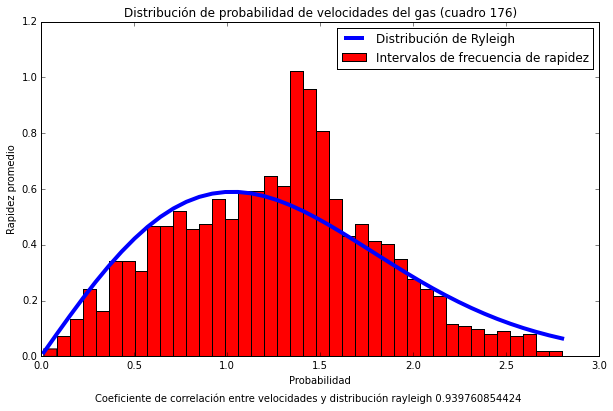

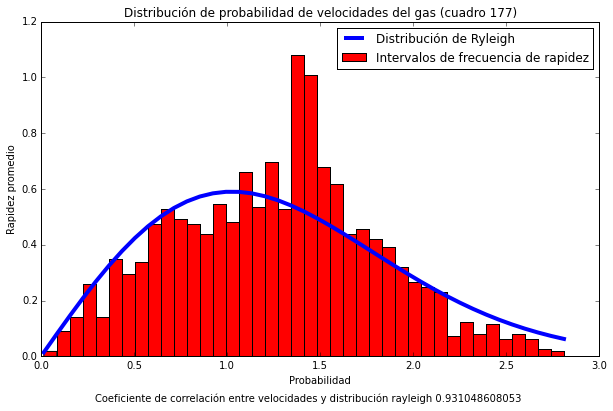

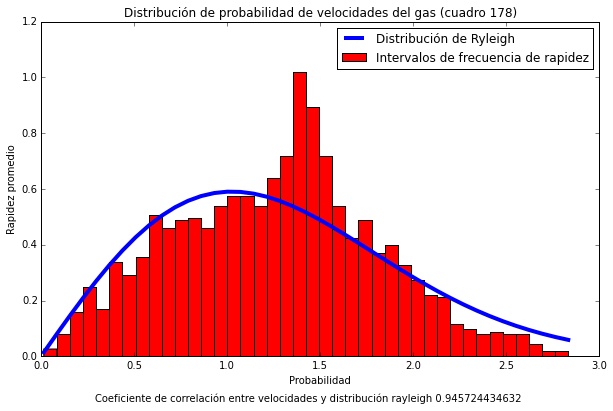

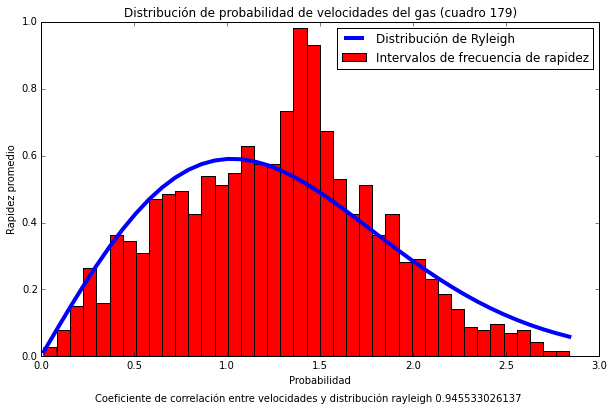

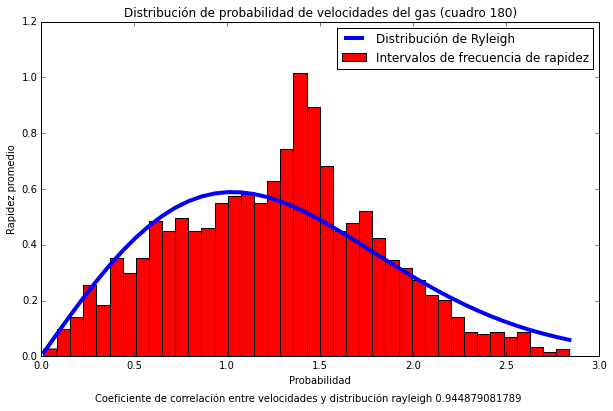

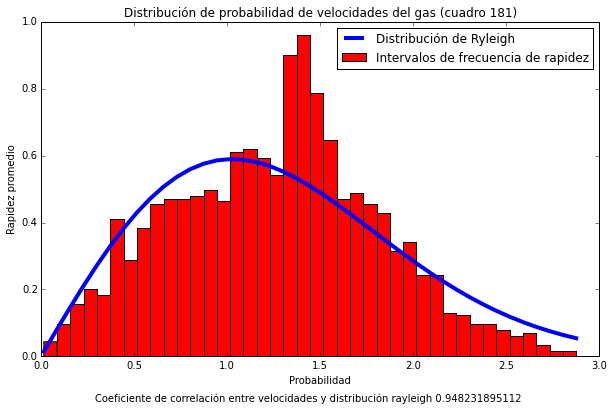

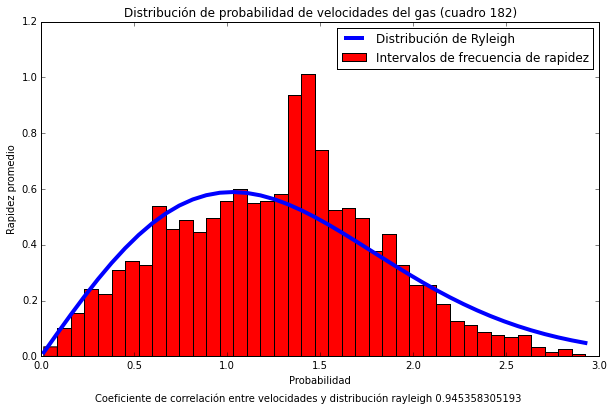

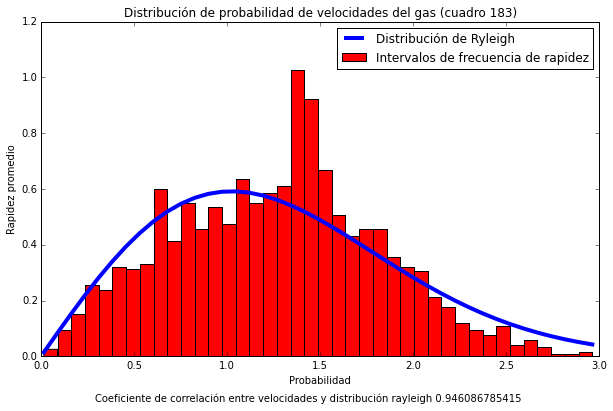

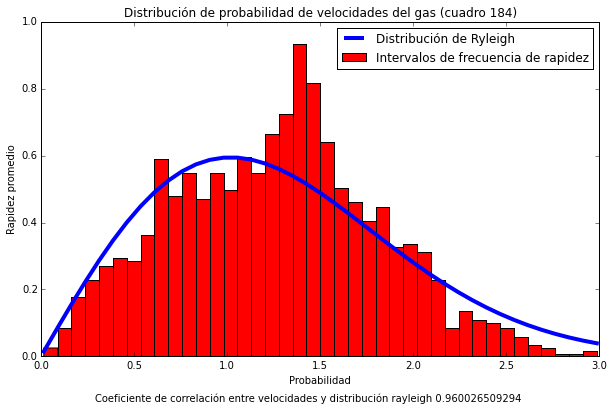

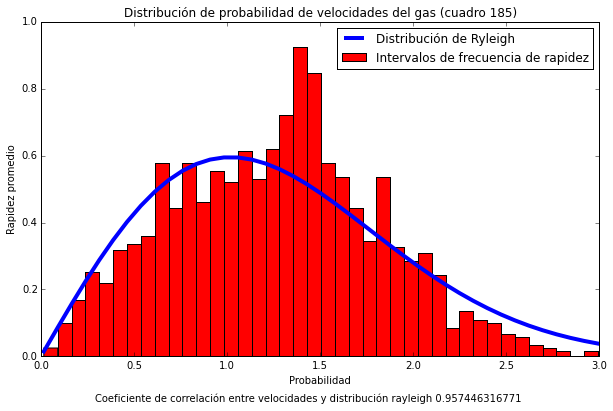

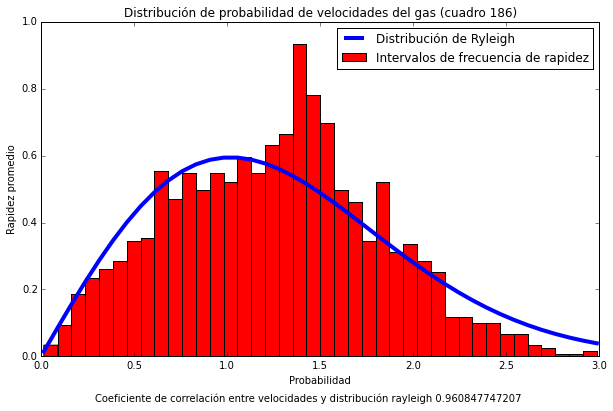

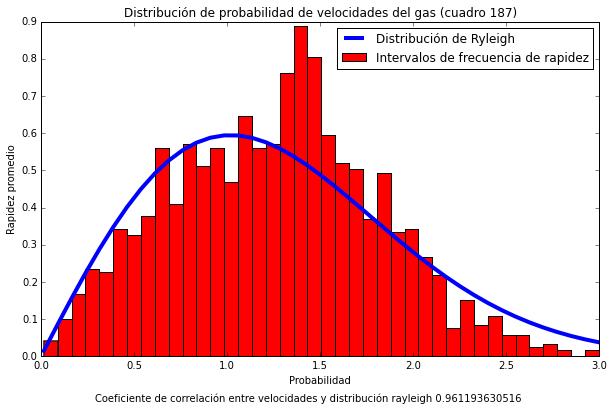

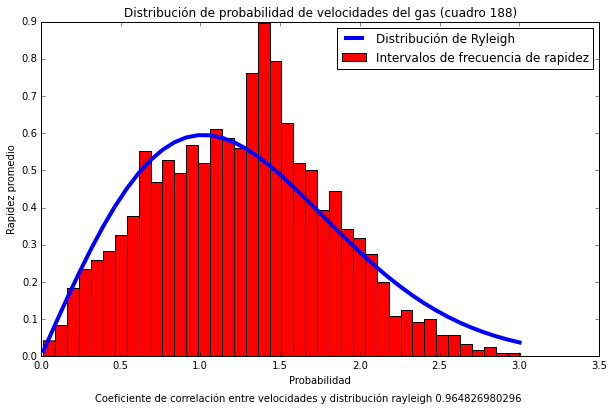

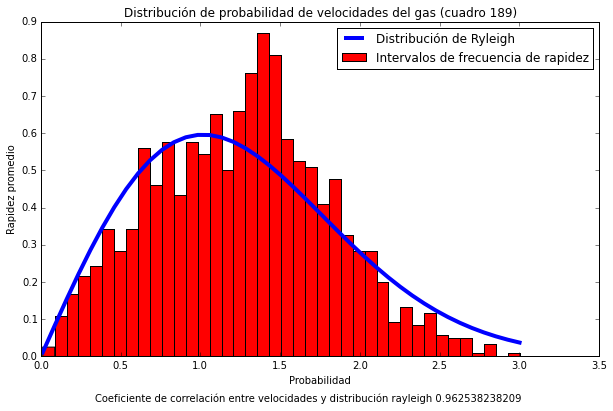

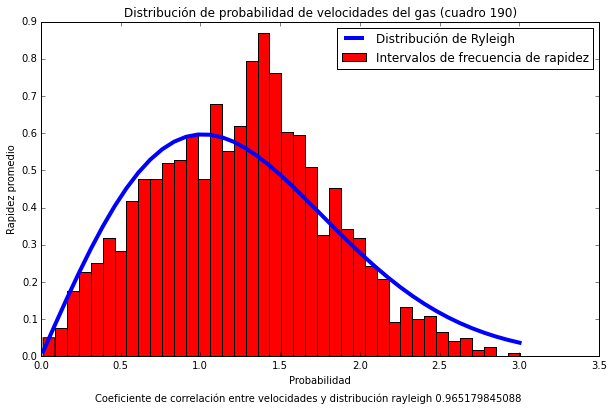

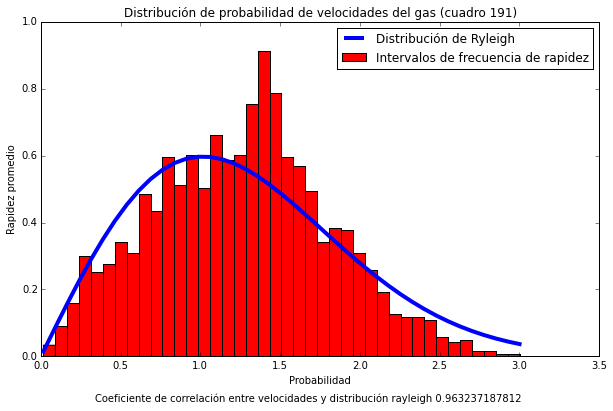

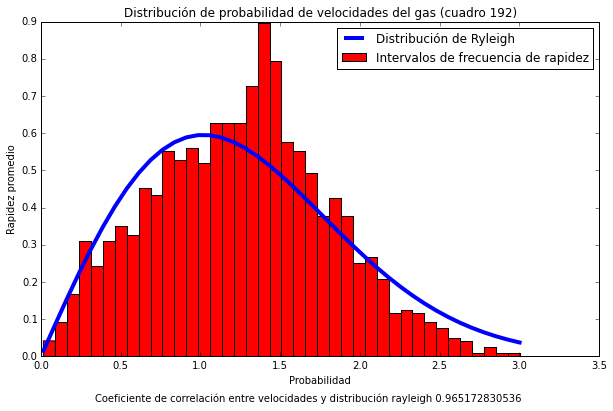

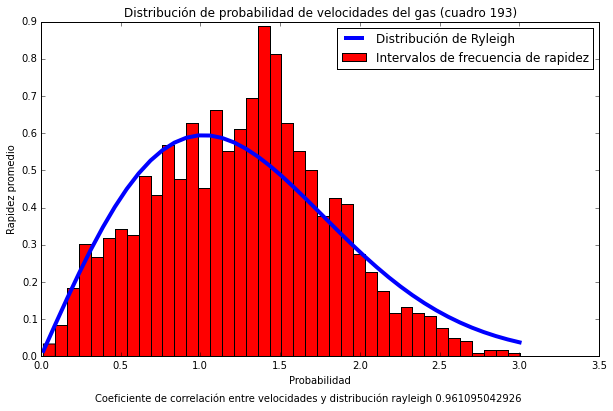

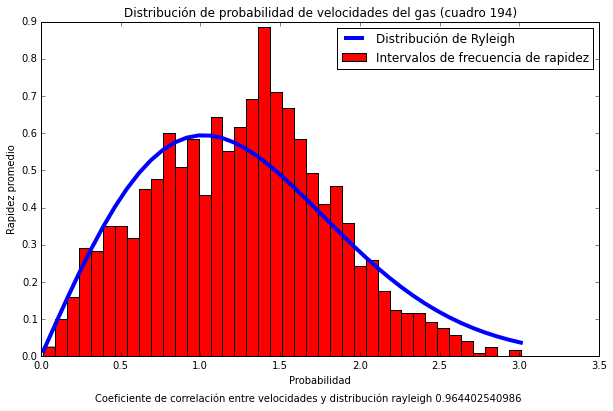

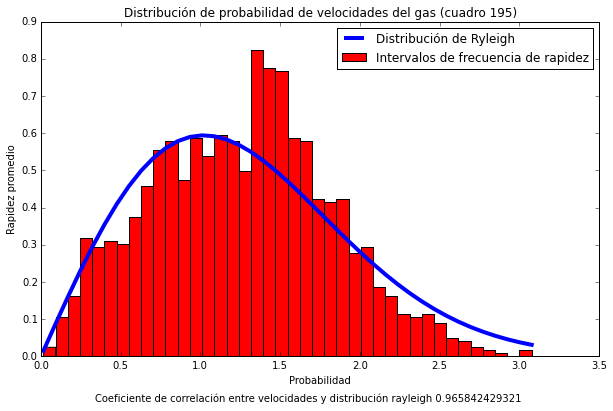

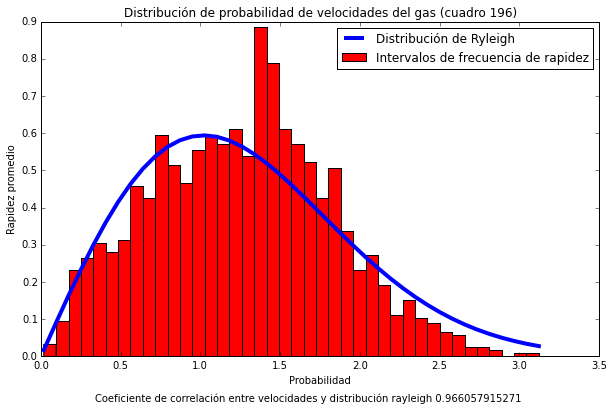

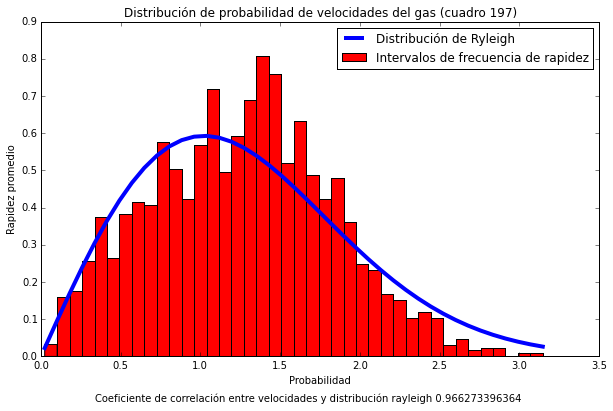

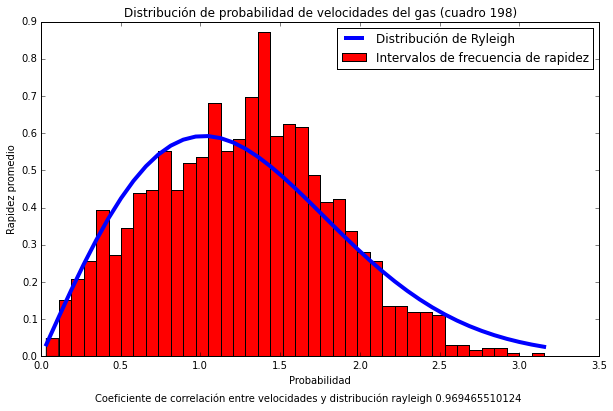

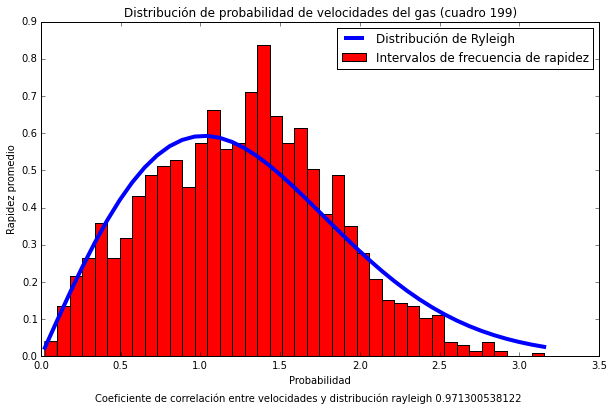

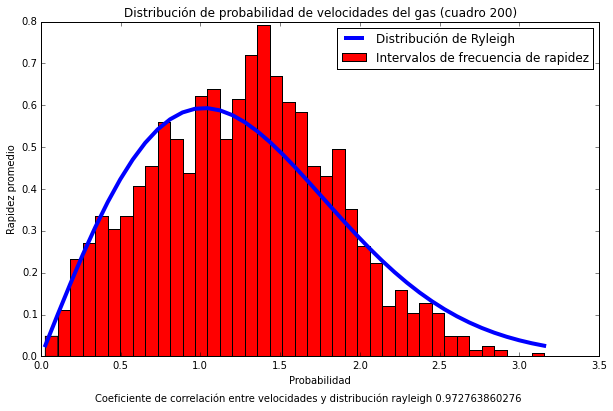

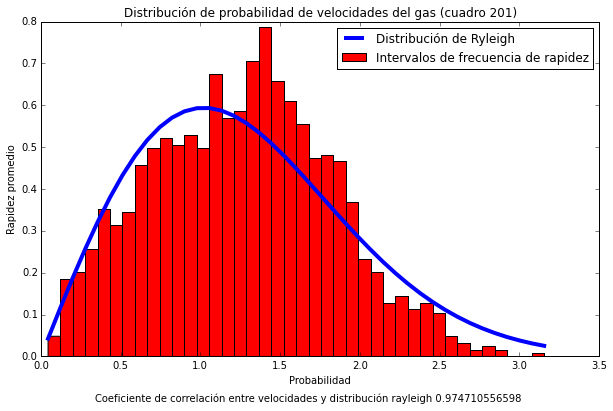

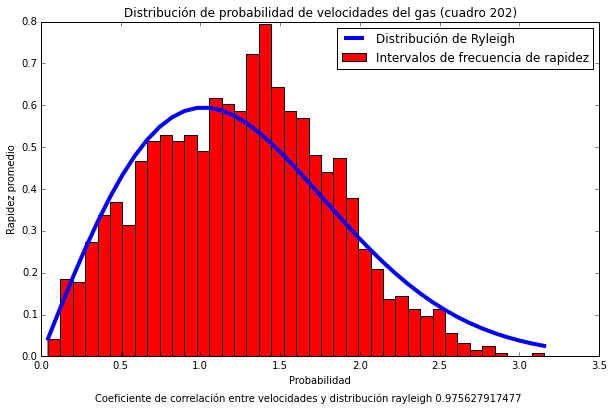

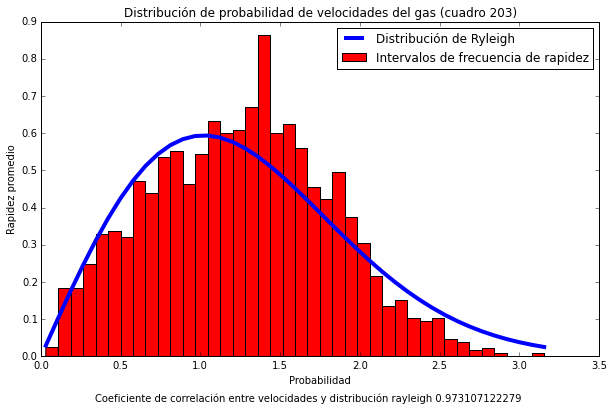

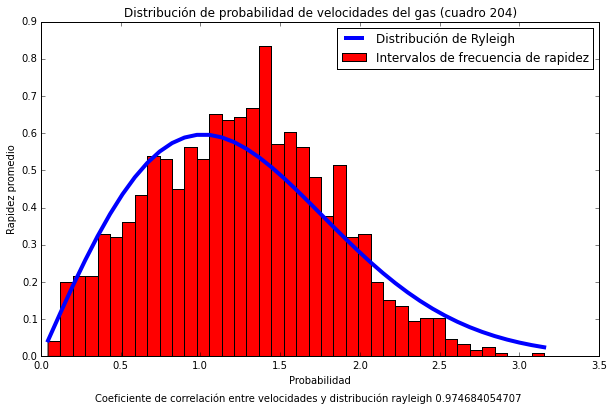

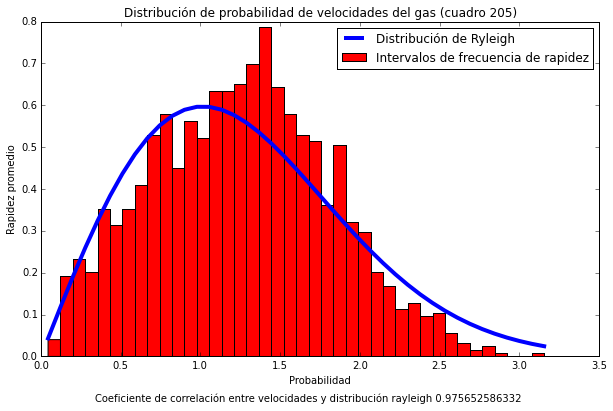

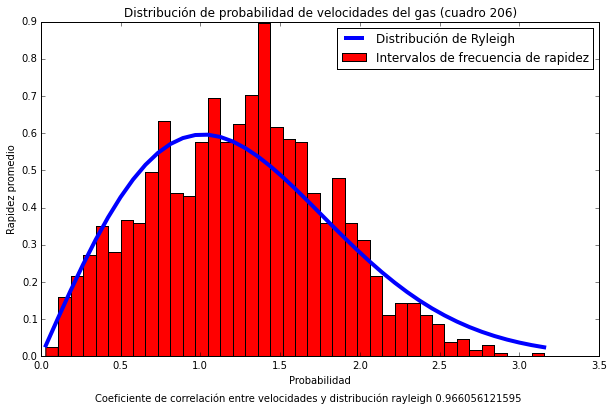

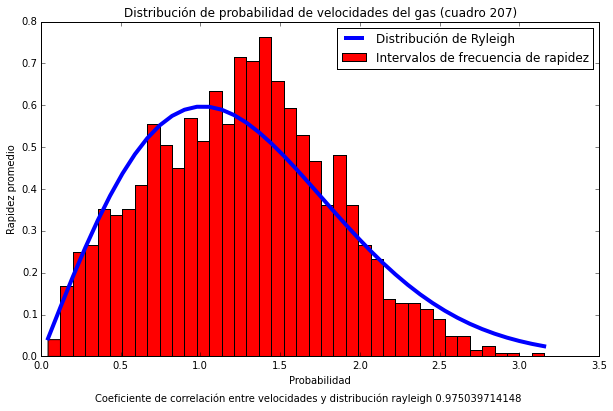

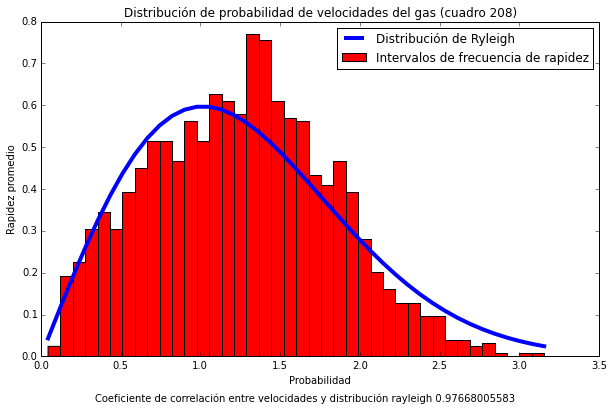

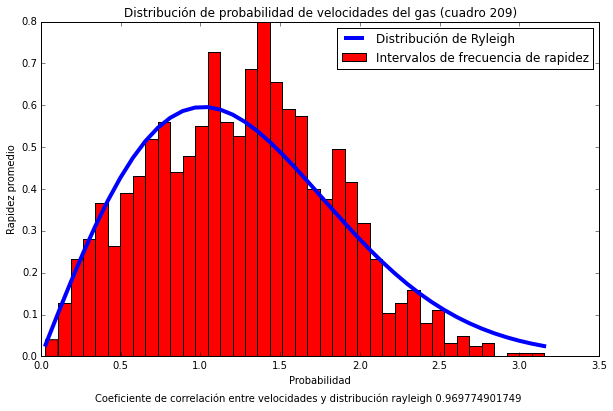

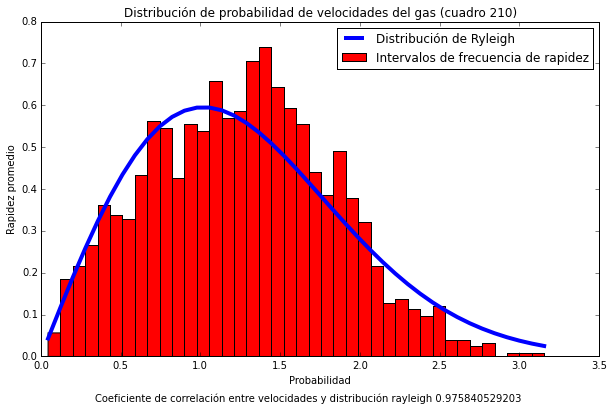

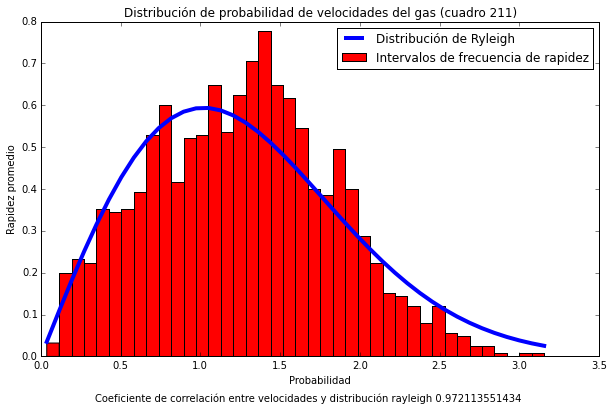

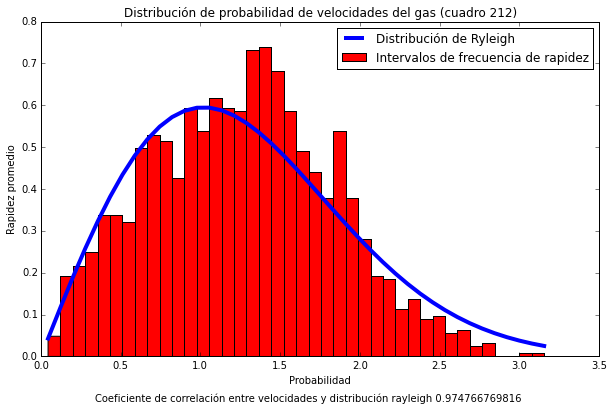

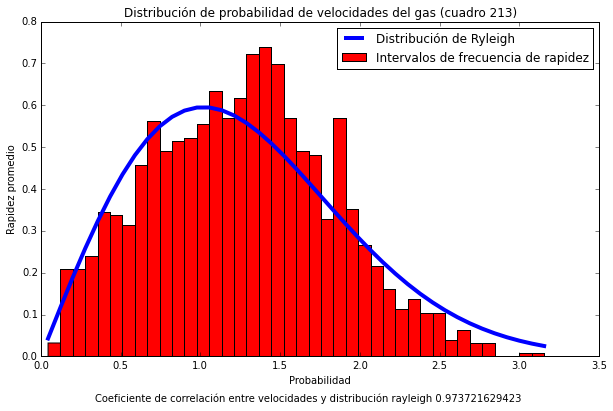

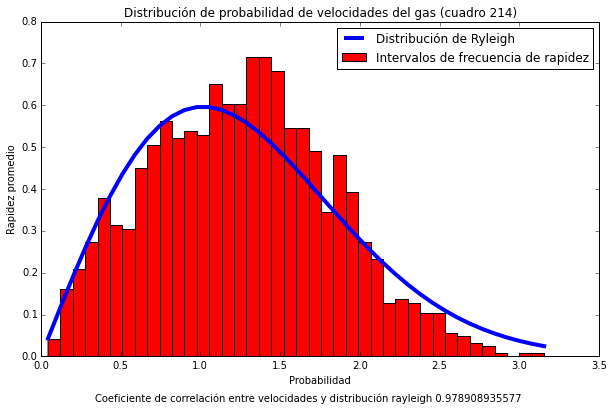

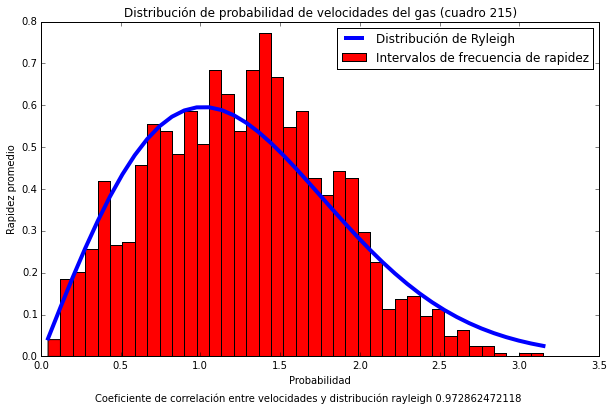

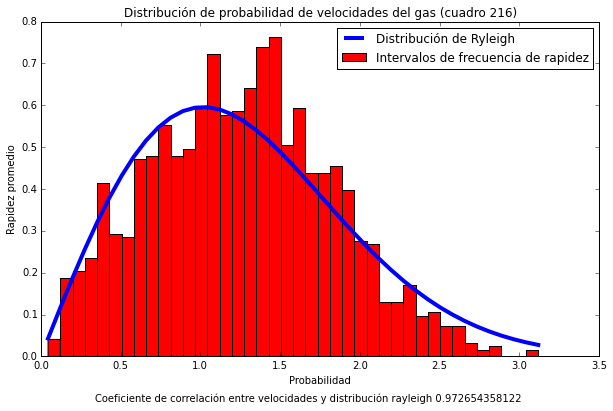

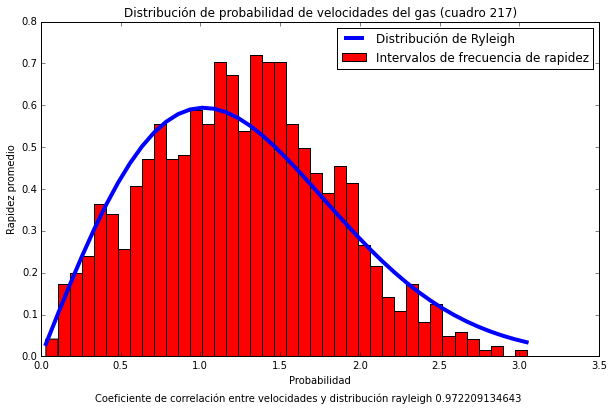

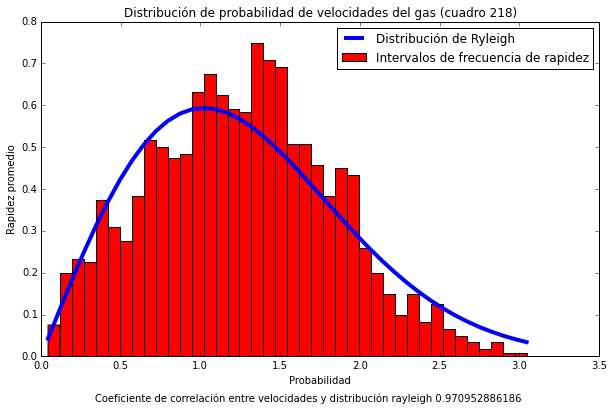

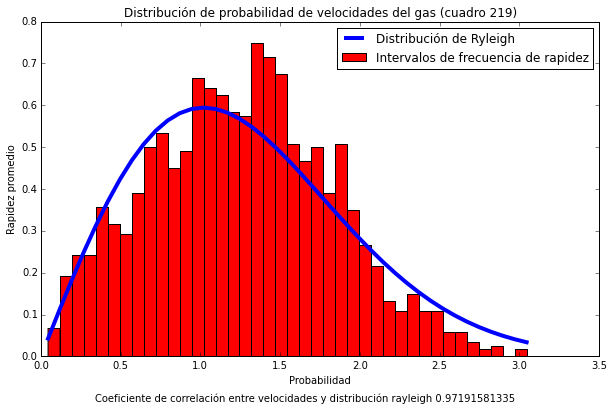

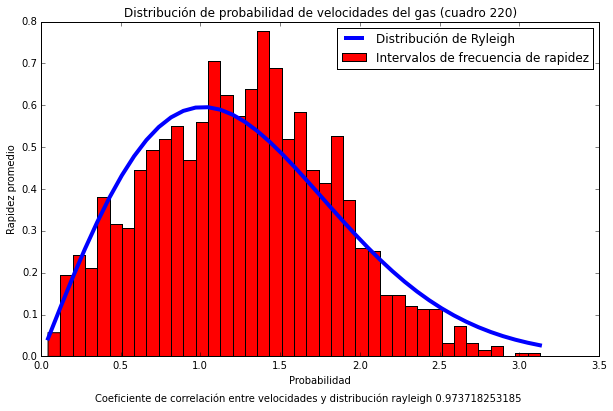

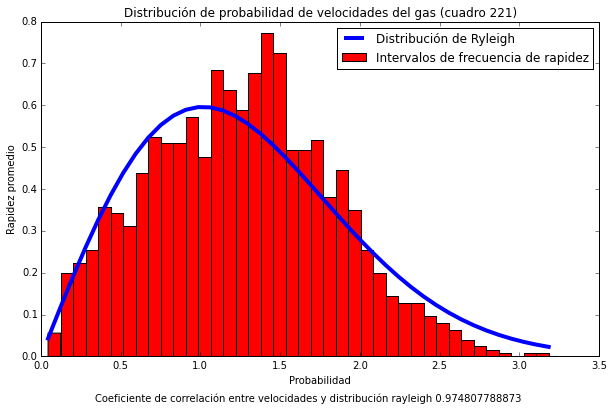

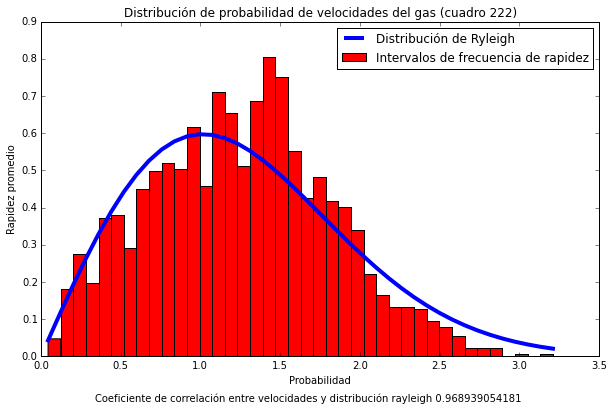

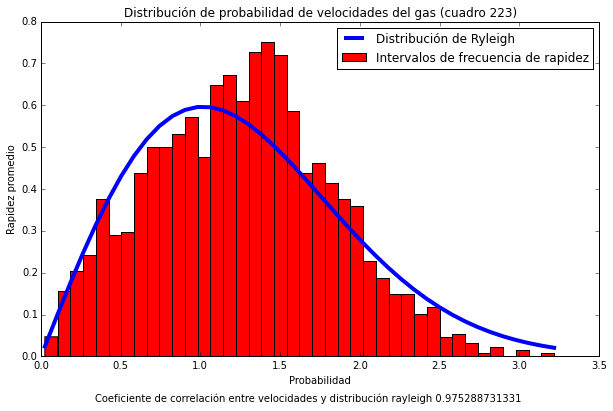

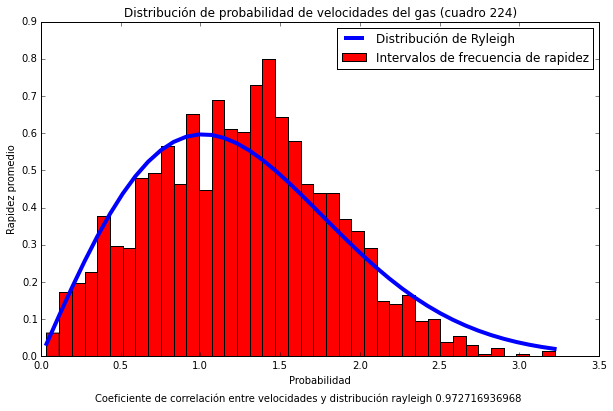

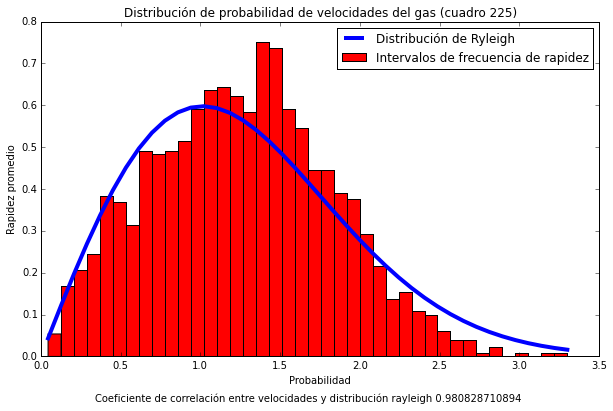

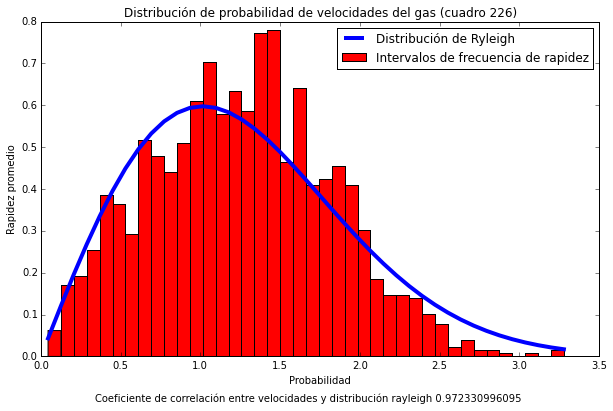

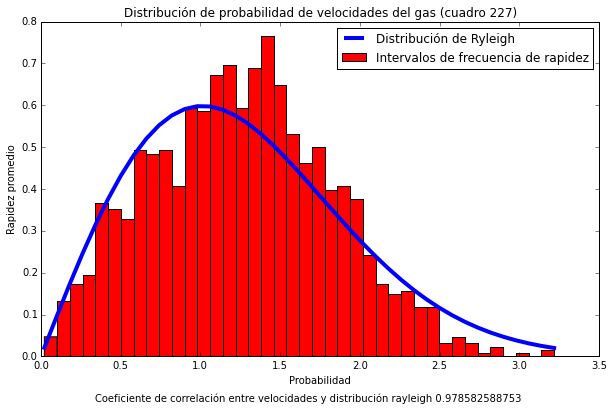

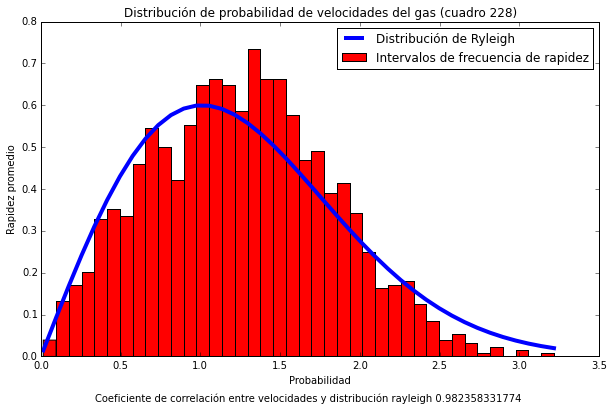

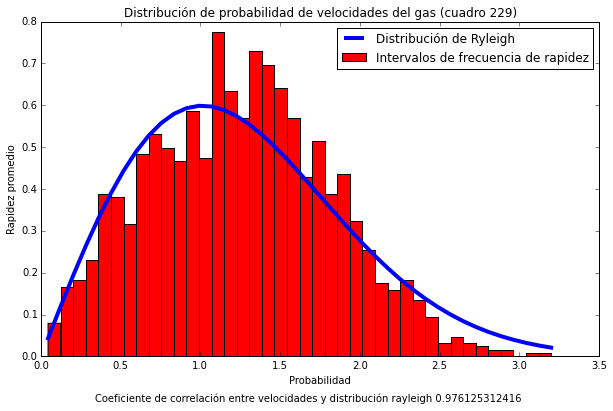

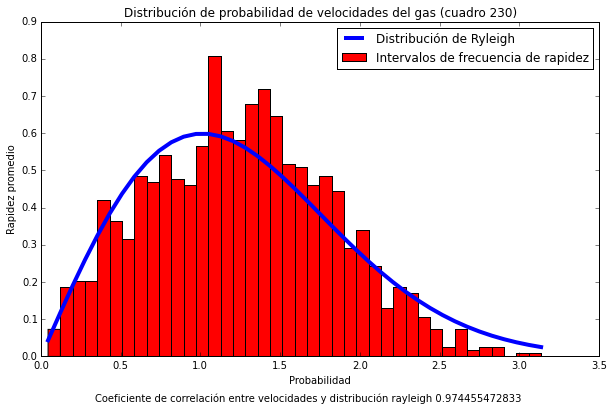

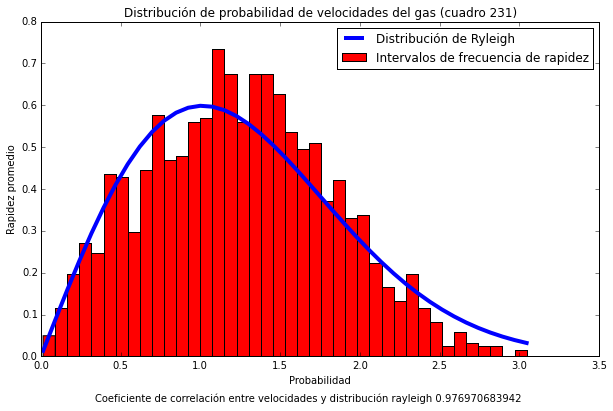

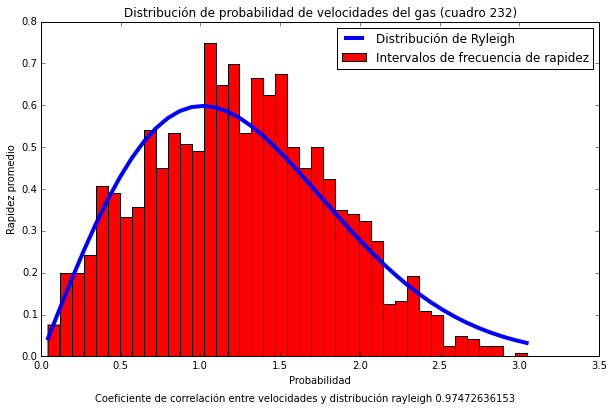

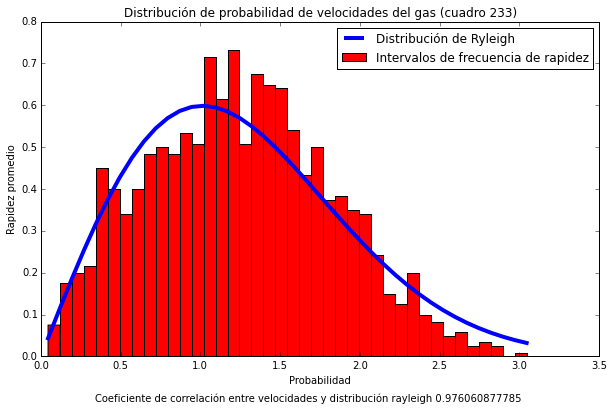

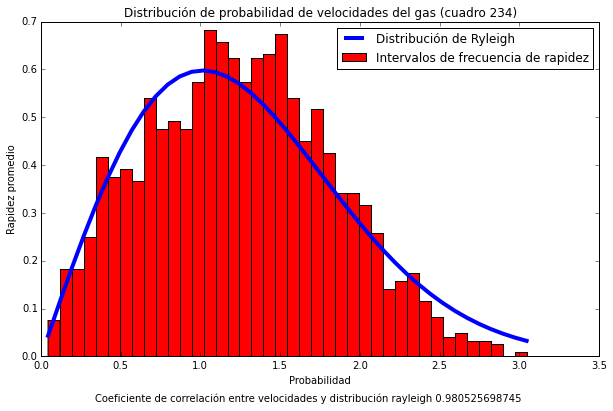

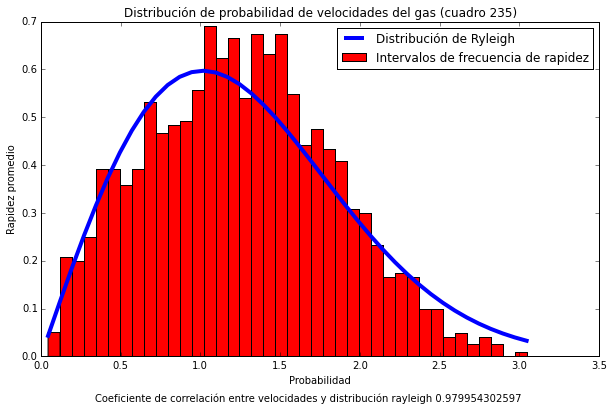

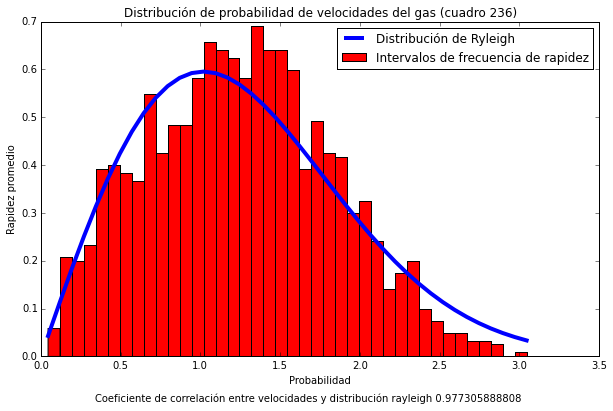

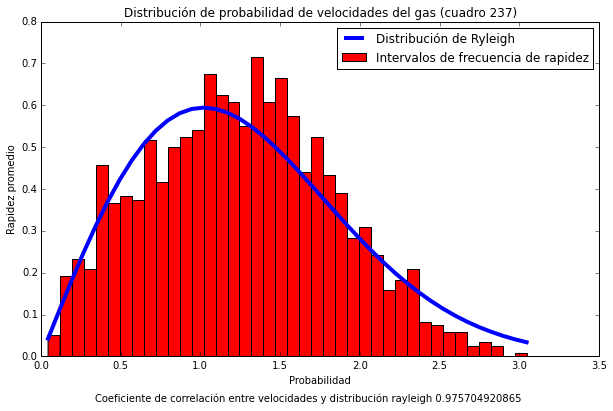

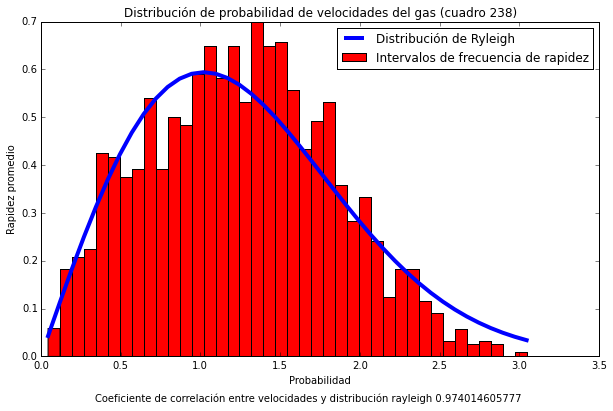

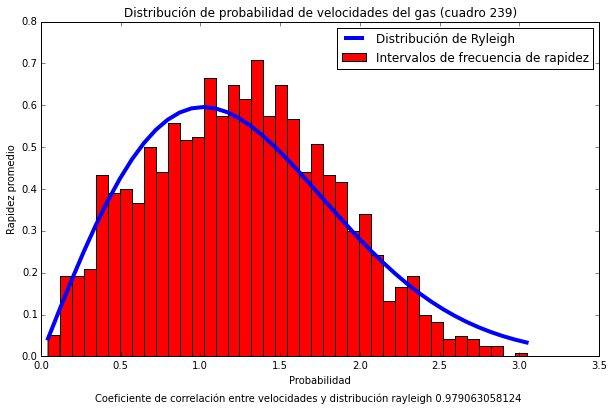

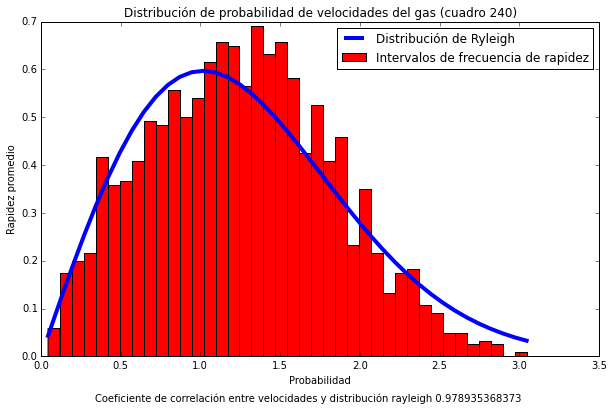

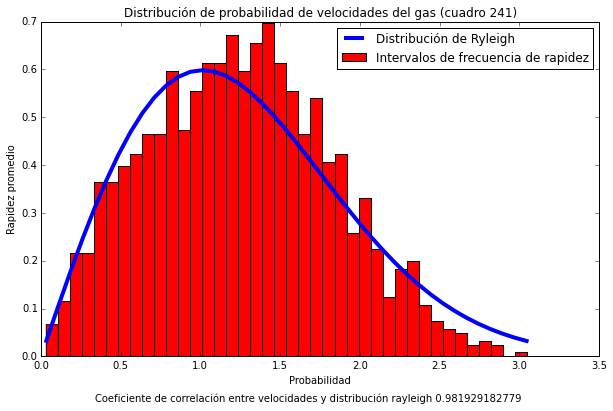

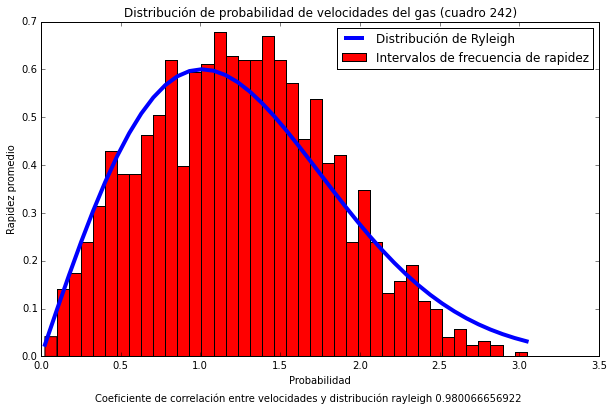

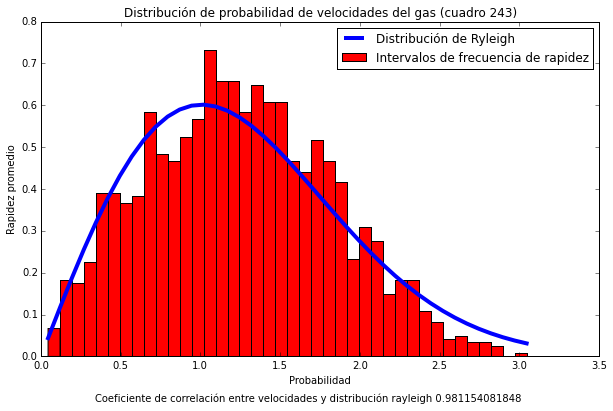

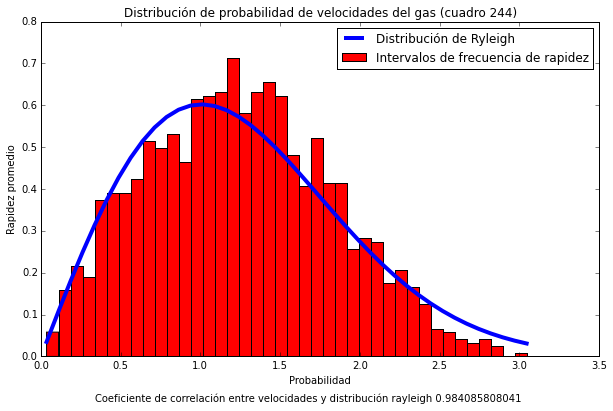

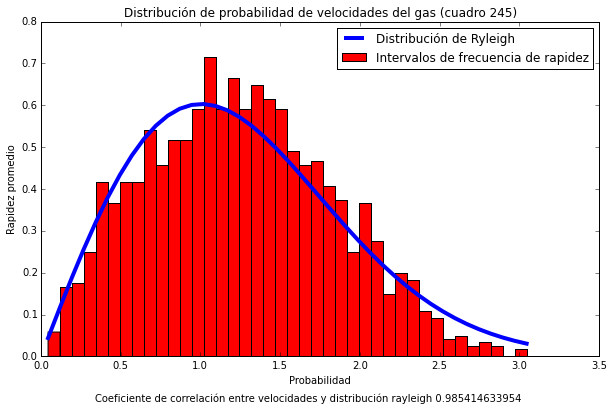

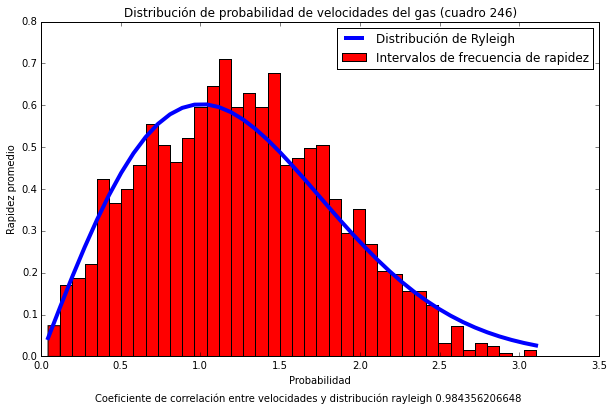

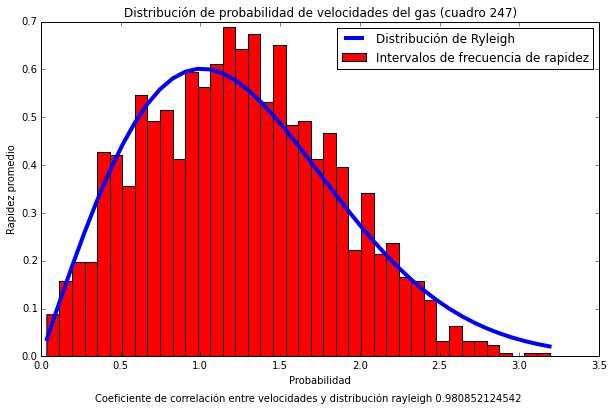

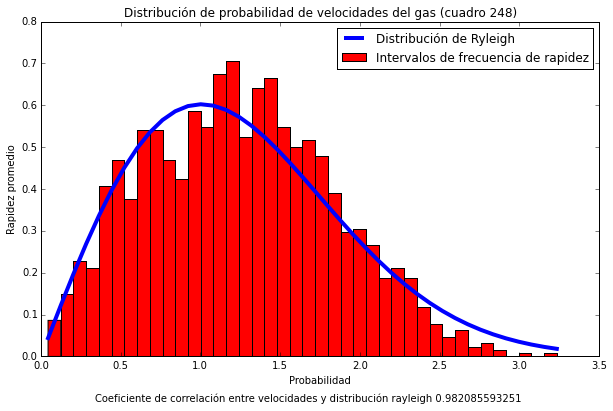

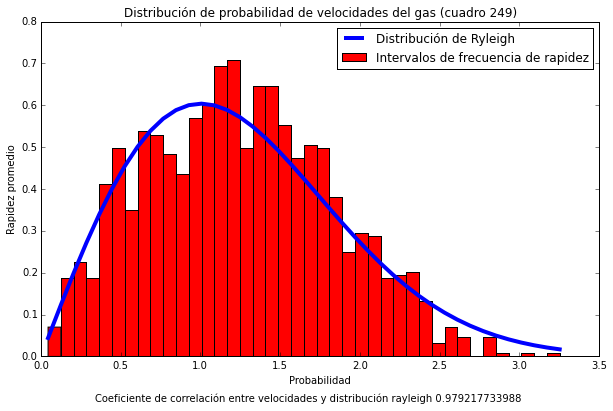

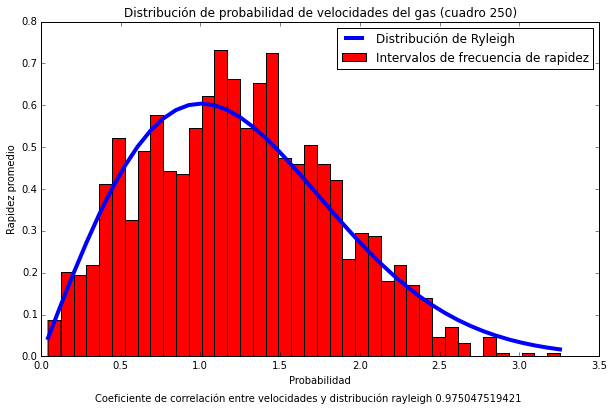

In [153]:
for i in range(1600,len(v),1600):
    fig = plt.figure(figsize=(10, 6))
    plt.title("Distribución de probabilidad de velocidades del gas (cuadro %d)"%(i/1600))
    plt.xlabel("Probabilidad")
    plt.ylabel("Rapidez promedio")
    histograma = plt.hist(v[(i-1600):i],bins=40,label='Intervalos de frecuencia de rapidez',color='red',normed=True)
    x= histograma[1]
    y= histograma[0]
    fitpars,covmat= curve_fit(distribucion_rayleigh,x[:-1],y)
    plt.plot(x,distribucion_rayleigh(x,*fitpars),label = "Distribución de Ryleigh",color="blue",linewidth=4)
    r_actual=np.mean(np.corrcoef(y,distribucion_rayleigh(x[:-1],*fitpars)))
    plt.figtext(0.2,.02,"Coeficiente de correlación entre velocidades y distribución rayleigh "+str(r_actual))
    plt.legend(loc=0)
    plt.savefig("rayleigh/rayleigh%d.png"%(i/1600))

In [158]:
os.system("convert -delay 20 -loop 0 $(ls rayleigh/*.png | sort -V) rayleigh.gif")

0